In [1]:
import os
import pandas as pd
from openpyxl import load_workbook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
#%matplotlib notebook
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import copy
import matplotlib as mpl
from mpl_toolkits import mplot3d

In [3]:
pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualTrials\Performance\Subject_Block_Session_Trial_Performance.xlsx'


df = pd.read_excel(open(pathName, 'rb'), sheet_name='Sheet1')
df_woNa = copy.deepcopy(df)

DayNr = [day[0] for day in df.Day]

df['DayNr'] = DayNr

TypingTechnique = ['MS' if len(day)>1 else 'DT' for day in df.Day]

df['TypingTechnique'] = TypingTechnique

#df.to_csv(r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualTrials\Performance\Subject_Block_Session_Trial_Performance.csv', sep=',',na_rep='', header=True, index=False)


In [4]:
df1 = copy.deepcopy(df) # for performance, correlation between R,L pupil size should not matter 

# Correlations

In [4]:
df1.corr()

,DayDT,Session,Trial,ScoreDifficulty,TotalTime_reading,TotalTime_writing,EffectiveTime_writing,TimePerKey,CharactersPerTotalTime,CharactersPerEffectiveTime,CorrectLettersPerTotalTime,CorrectLettersPerEffectiveTime,ActivationsPerTotalTime,ErrorRate,BackspaceActivations,ReadTextEventsPerCharacter,ReadTextEventsPerTotalTime,AttendedButNotSelected
DayDT,1.000000,0.006989,-0.011497,-0.269736,0.031616,-0.135319,-0.212914,-0.568317,0.504784,0.388100,0.342667,0.377270,0.492021,-0.171447,-0.113313,-0.212303,-0.194865,-0.598486
Session,0.006989,1.000000,-0.019154,0.016463,-0.000474,-0.030580,-0.035029,-0.061370,0.102231,0.086424,0.101643,0.088609,0.095814,0.012004,0.034015,-0.046426,-0.008603,-0.075309
Trial,-0.011497,-0.019154,1.000000,-0.007104,-0.036726,-0.033980,-0.035355,-0.022327,0.063883,0.065303,0.080297,0.086176,0.066716,-0.046212,-0.000560,-0.043379,-0.060987,-0.048177
ScoreDifficulty,-0.269736,0.016463,-0.007104,1.000000,0.426582,0.614301,0.559486,0.224894,-0.319634,-0.173300,-0.440510,-0.302549,-0.317707,0.415821,0.127876,0.338865,0.327645,0.298489
TotalTime_reading,0.031616,-0.000474,-0.036726,0.426582,1.000000,0.593192,0.525400,-0.007630,-0.006500,0.046628,-0.040271,0.018914,-0.009453,0.034213,0.030857,0.043301,0.089904,-0.031798
TotalTime_writing,-0.135319,-0.030580,-0.033980,0.614301,0.593192,1.000000,0.936461,0.245320,-0.326177,-0.192086,-0.461410,-0.352350,-0.316858,0.186478,0.160783,0.213183,0.166385,0.256764
EffectiveTime_writing,-0.212914,-0.035029,-0.035355,0.559486,0.525400,0.936461,1.000000,0.437628,-0.438835,-0.394595,-0.447424,-0.503835,-0.438694,0.136552,0.010336,0.113504,0.101585,0.318490
TimePerKey,-0.568317,-0.061370,-0.022327,0.224894,-0.007630,0.245320,0.437628,1.000000,-0.851226,-0.787436,-0.480898,-0.740182,-0.858486,0.114969,-0.192790,0.085974,0.100611,0.682546
CharactersPerTotalTime,0.504784,0.102231,0.063883,-0.319634,-0.006500,-0.326177,-0.438835,-0.851226,1.000000,0.872700,0.702537,0.847175,0.993874,-0.213228,0.232899,-0.284986,-0.301995,-0.681316
CharactersPerEffectiveTime,0.388100,0.086424,0.065303,-0.173300,0.046628,-0.192086,-0.394595,-0.787436,0.872700,1.000000,0.449869,0.863179,0.889390,-0.115579,0.516129,-0.046685,-0.120952,-0.529684


In [19]:
df1[np.logical_and(np.logical_and(df1.Subject=='ac', df1.TypingTechnique=='DT'), df1.Trial==1)]

,Subject,Day,DayDT,Language,Session,SessionDifficulty,Trial,ScoreDifficulty,TotalTime_reading,TotalTime_writing,...,CorrectLettersPerTotalTime,CorrectLettersPerEffectiveTime,ActivationsPerTotalTime,ErrorRate,BackspaceActivations,ReadTextEventsPerCharacter,ReadTextEventsPerTotalTime,AttendedButNotSelected,DayNr,TypingTechnique
1,ac,1,1,EN,1,E,1,3.0,28.349004,65.090704,...,8.111757,11.857498,8.468411,0.000000,0.022727,0.000000,0.000000,0.909091,1,DT
6,ac,1,1,EN,2,D,1,6.0,117.064618,244.722947,...,9.463763,13.376235,9.556477,0.000000,0.025907,0.000000,0.000000,0.528497,1,DT
11,ac,2,2,EN,1,D,1,3.0,22.366628,74.813953,...,10.425863,14.056031,9.681164,0.000000,0.000000,0.000000,0.000000,0.738462,2,DT
16,ac,2,2,EN,2,E,1,3.0,34.422830,87.208388,...,11.008115,16.695910,12.353614,0.000000,0.012500,0.000000,0.000000,0.175000,2,DT
31,ac,4,3,EN,1,D,1,4.0,95.075045,157.758289,...,11.714123,20.800092,12.713684,0.012658,0.038217,0.019108,0.007419,0.216561,4,DT
36,ac,4,3,EN,2,E,1,3.0,25.600836,66.387750,...,14.460499,24.489540,16.103176,0.055728,0.060976,0.036585,0.018494,0.060976,4,DT
41,ac,5,4,EN,1,E,1,3.0,21.276494,49.842254,...,15.408613,27.319784,14.554239,0.000000,0.000000,0.046875,0.022856,0.140625,5,DT
46,ac,5,4,EN,2,D,1,4.0,44.716538,60.754626,...,16.393813,34.663723,16.280674,0.085623,0.048193,0.012048,0.004839,0.072289,5,DT


In [17]:
df1

,Subject,Day,DayDT,Language,Session,SessionDifficulty,Trial,ScoreDifficulty,TotalTime_reading,TotalTime_writing,...,CorrectLettersPerTotalTime,CorrectLettersPerEffectiveTime,ActivationsPerTotalTime,ErrorRate,BackspaceActivations,ReadTextEventsPerCharacter,ReadTextEventsPerTotalTime,AttendedButNotSelected,DayNr,TypingTechnique
0,ac,1,1,EN,1,E,0,4.0,28.060378,95.071231,...,8.330596,11.817320,9.125520,0.000000,0.015152,0.000000,0.000000,0.500000,1,DT
1,ac,1,1,EN,1,E,1,3.0,28.349004,65.090704,...,8.111757,11.857498,8.468411,0.000000,0.022727,0.000000,0.000000,0.909091,1,DT
2,ac,1,1,EN,1,E,2,3.0,12.382355,37.000500,...,7.135039,11.423826,8.049529,0.121739,0.000000,0.000000,0.000000,1.043478,1,DT
3,ac,1,1,EN,1,E,3,4.0,27.234887,96.319363,...,8.596402,11.717195,9.259407,0.047418,0.000000,0.014085,0.002819,0.478873,1,DT
4,ac,1,1,EN,1,E,4,4.0,12.696581,38.889315,...,9.565609,14.192390,10.902908,0.000000,0.000000,0.032258,0.007582,1.225806,1,DT
5,ac,1,1,EN,2,D,0,5.0,47.791530,145.427379,...,8.169026,11.144058,9.007259,0.095519,0.113208,0.047170,0.018870,0.849057,1,DT
6,ac,1,1,EN,2,D,1,6.0,117.064618,244.722947,...,9.463763,13.376235,9.556477,0.000000,0.025907,0.000000,0.000000,0.528497,1,DT
7,ac,1,1,EN,2,D,2,6.0,108.973300,200.626631,...,10.347579,14.293732,9.340431,0.000000,0.005780,0.011561,0.003545,0.641618,1,DT
8,ac,1,1,EN,2,D,3,6.0,91.302972,235.087259,...,10.157930,14.527500,8.809875,0.047969,0.019608,0.029412,0.010014,0.627451,1,DT
9,ac,1,1,EN,2,D,4,6.0,64.251252,221.989568,...,8.270659,12.639601,9.029625,0.095488,0.036810,0.006135,0.001429,0.662577,1,DT


# Box plots of typing speed

In [5]:
variable = 'CharactersPerTotalTime'

# sDiff

print('sDiff')
print('E', np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])))
print('D',np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])))


# Day
print('Day')
day1_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)]))
day1_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])))
day2_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)]))
day2_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])))
day3_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)]))
day3_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])))
day4_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)]))
day4_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])))

day_m = [day2_m-day1_m, day3_m-day2_m, day4_m-day3_m]
day_s = [np.sqrt(day1_s**2+day2_s**2), np.sqrt(day2_s**2 + day3_s**2), np.sqrt(day3_s**2+day4_s**2)]
print(day_m)
print(np.mean(day_m))
print(day_s)
print(np.mean(day_s))

# Session
print('Session')
print(np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==2)])-np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==1)]))
session2_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==2)])))
session1_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==1)])))
print(np.sqrt(session1_s**2+session2_s**2))


sDiff
E 10.095492372453586
0.18408727241986234
D 9.214766660966223
0.17323667392833705
Day
[0.4296573401568242, 0.7040384348910198, 0.6616275840880412]
0.5984411197119618
[0.3501965540061883, 0.3478747226860315, 0.357517123349721]
0.3518628000139803
Session
0.8626248930254814
0.25319152506889087


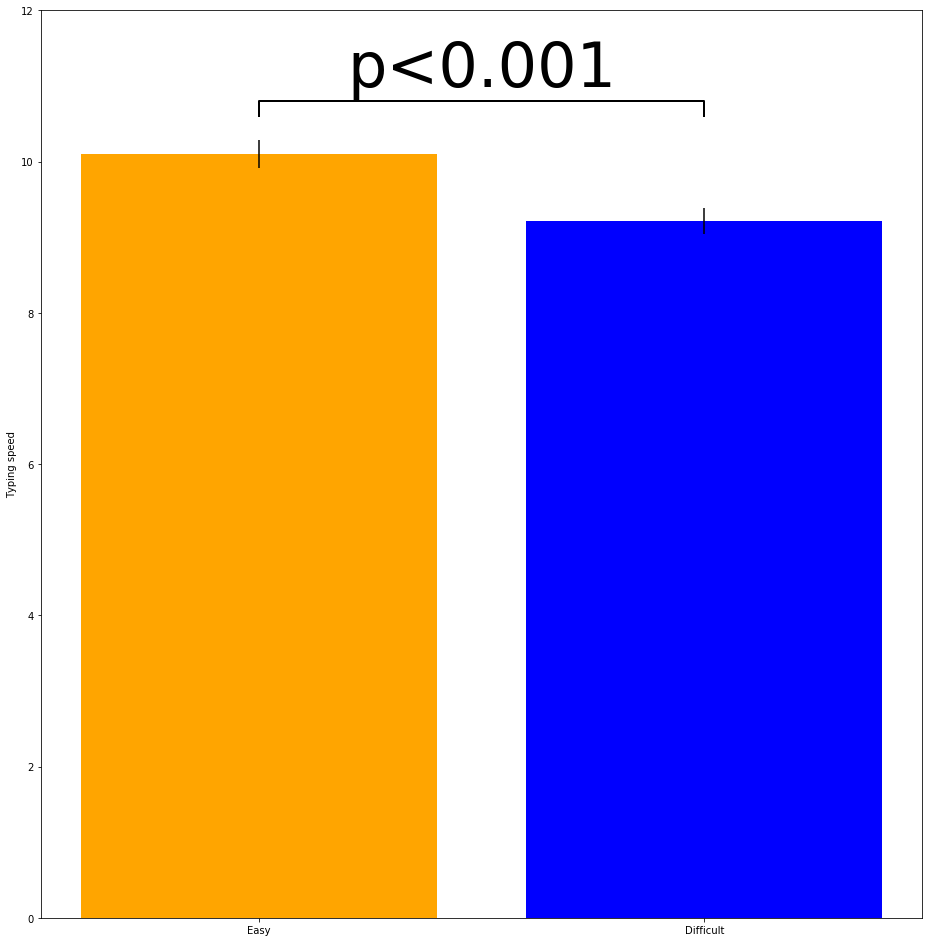

In [8]:
PlotTitle = 'Characters Per Total Time'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CharactersPerTotalTime']



label_fontSize = 72
others_fontSize = 62

#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 12])
ax1.set_ylabel('Typing speed')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level
maxTime = 10.6
y_time, h, col = maxTime, 0.2, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
#fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\typingSpeed.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Typing Speed vs Blocks

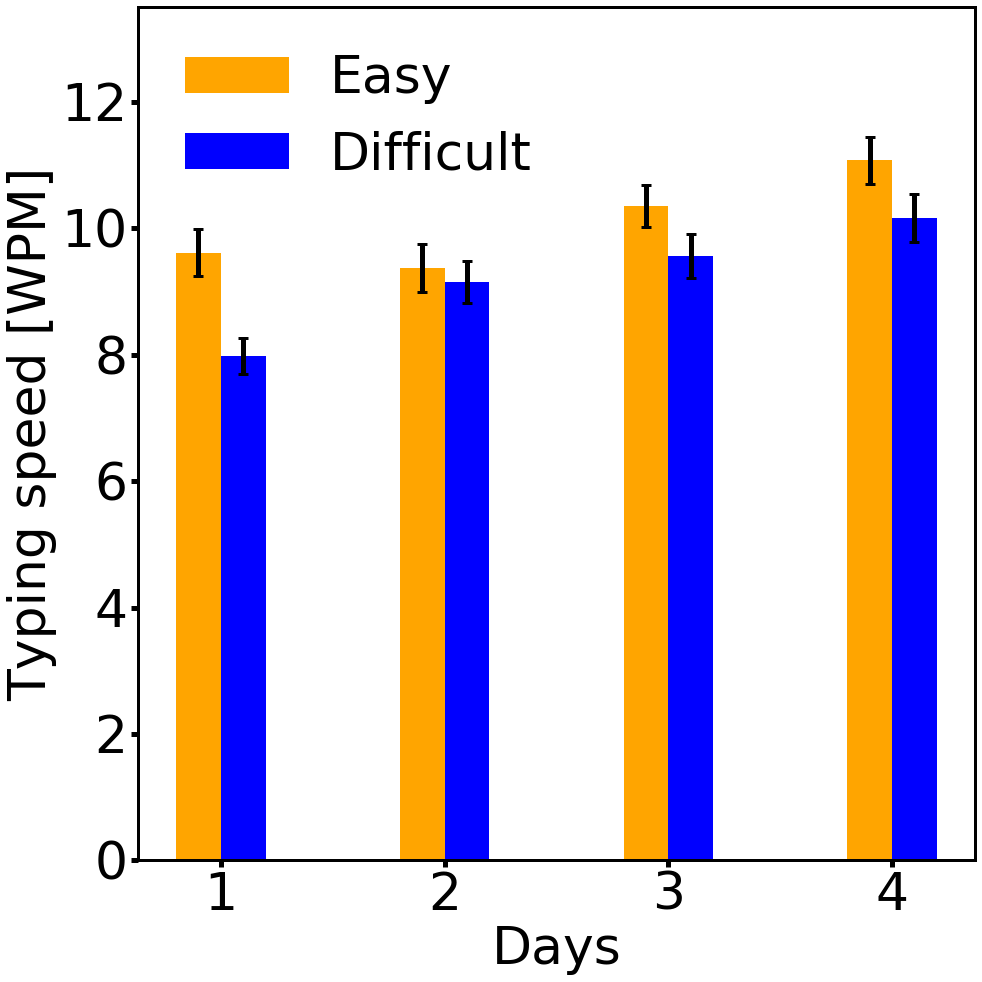

In [12]:
PlotTitle = 'Characters Per Total Time'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CharactersPerTotalTime']



label_fontSize = 42
others_fontSize = 32

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'CharactersPerTotalTime'



for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue

    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5, error_kw=dict(lw=5, capsize=5, capthick=3))
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5, error_kw=dict(lw=5, capsize=5, capthick=3))
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 13.5])
ax1.set_ylabel('Typing speed [WPM]')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 52})
ax1.legend((p1, p2), ('Easy', 'Difficult'), frameon=False)

mpl.rcParams['axes.linewidth'] = 3
ax = plt.gca()
ax.tick_params(width=5, length = 7)


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\typingSpeed_blocks.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

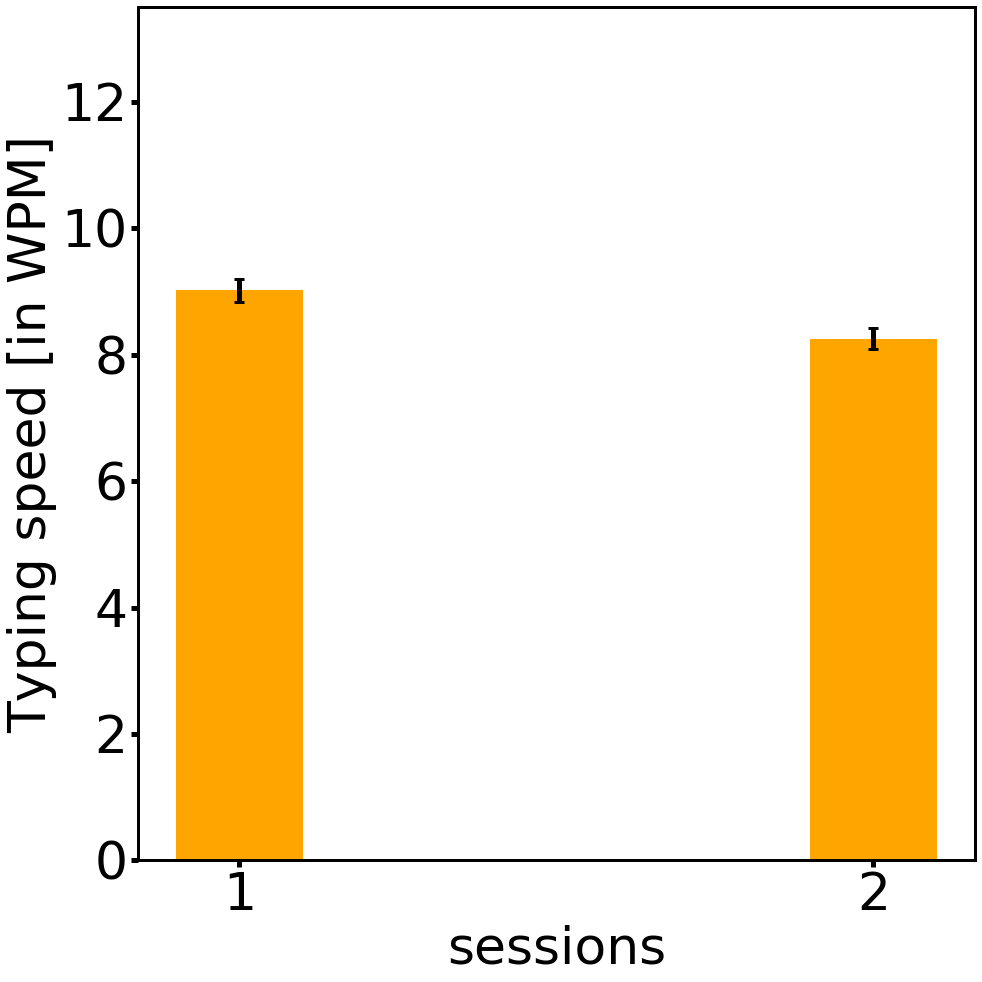

In [6]:
PlotTitle = 'Characters Per Total Time'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CharactersPerTotalTime']



label_fontSize = 42
others_fontSize = 32

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'CharactersPerTotalTime'



for indsession, session in enumerate(np.unique(df1.Session)):
    if session==0:
        continue

    p1 = ax1.bar(x_inds[indsession-1], df1[variable][df1.Session==session].mean(), yerr = \
                 df1[variable][df1.Session==session].std()/ \
                 np.sqrt(df1[variable][df1.Session==session].count()), \
                 color='orange', label='Easy', width=0.5, error_kw=dict(lw=5, capsize=5, capthick=3))
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2'])
ax1.set_ylim([0, 13.5])
ax1.set_ylabel('Typing speed [in WPM]')
ax1.set_xlabel('sessions')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 52})

mpl.rcParams['axes.linewidth'] = 3
ax = plt.gca()
ax.tick_params(width=5, length = 7)


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\typingSpeed_sessionsOnly.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

-0.01452304683021488 0.3713156431024523
1.761934213771978 0.3361762300071281


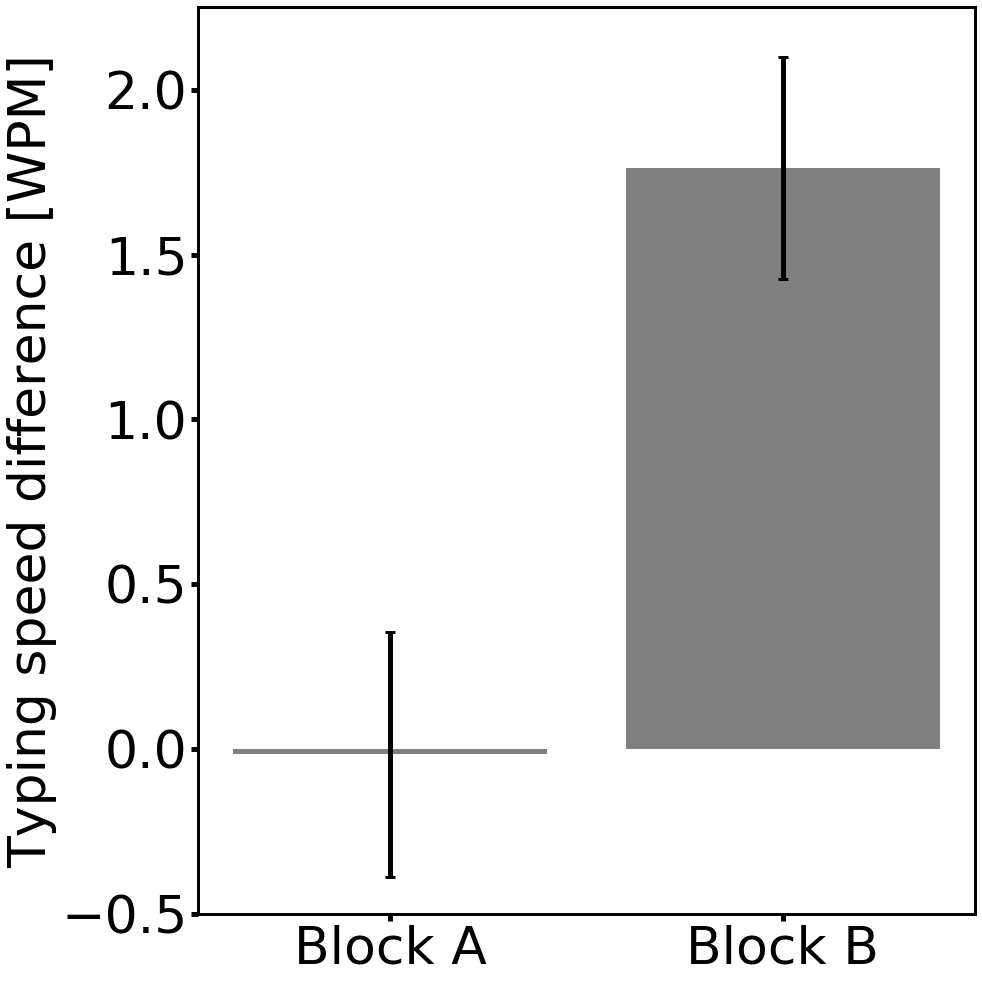

In [10]:
typingSpeed_sessionA_mean = np.mean(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')]) - np.mean(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])
typingSpeed_sessionA_std = np.sqrt((np.std(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])/np.sqrt(len(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])))**2 + (np.std(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])/np.sqrt(len(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])))**2)


typingSpeed_sessionB_mean = np.mean(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')]) - np.mean(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])
typingSpeed_sessionB_std = np.sqrt((np.std(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])/np.sqrt(len(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])))**2 + (np.std(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])/np.sqrt(len(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])))**2)

print(typingSpeed_sessionA_mean, typingSpeed_sessionA_std)
print(typingSpeed_sessionB_mean, typingSpeed_sessionB_std)

PlotTitle = 'Characters Per Total Time'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 42
others_fontSize = 32

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'CharactersPerTotalTime'





p1 = ax1.bar(x_inds[0], typingSpeed_sessionA_mean, yerr = typingSpeed_sessionA_std, color='gray', \
            error_kw=dict(lw=5, capsize=5, capthick=3))
    
p2 = ax1.bar(x_inds[1], typingSpeed_sessionB_mean, yerr = typingSpeed_sessionB_std, color='gray',\
             error_kw=dict(lw=5, capsize=5, capthick=3))
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Block A', 'Block B'])
ax1.set_ylim([-0.5, 2.25])
ax1.set_ylabel('Typing speed difference [WPM]')
#ax1.set_xlabel('Sessions')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 52})


# annotate with mean values
#maxTime0 = 0.5
#ax1.text(x_inds[0], maxTime0, "mean = " + str(np.round(typingSpeed_sessionA_mean, 3)), ha='center', va='bottom', fontsize = others_fontSize)
#maxTime1 = 2.1
#ax1.text(x_inds[1], maxTime1, "mean = " + str(np.round(typingSpeed_sessionB_mean, 3)), ha='center', va='bottom', fontsize = others_fontSize)

mpl.rcParams['axes.linewidth'] = 3
ax = plt.gca()
ax.tick_params(width=5, length = 7)

plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\typingSpeed_sessions.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

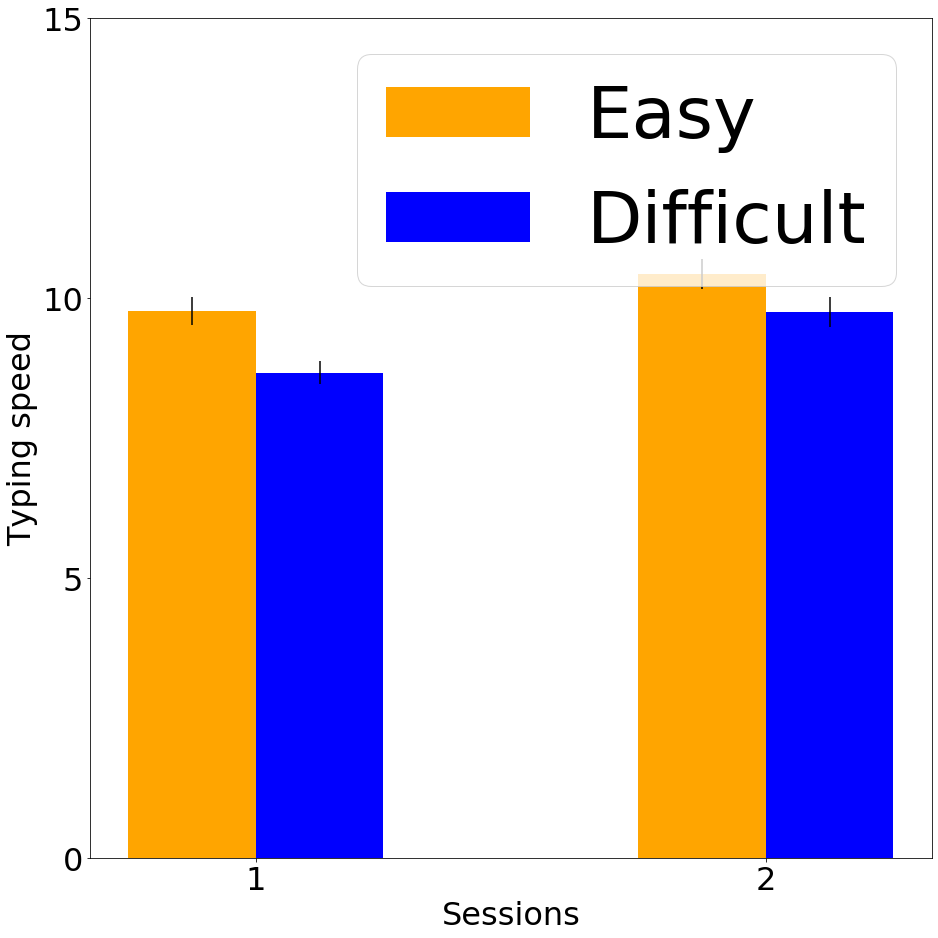

In [11]:
PlotTitle = 'Characters Per Total Time'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CharactersPerTotalTime']



label_fontSize = 72
others_fontSize = 62

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,3]

list1 = list()
x_list1 = list()

variable = 'CharactersPerTotalTime'



for indDay, session in enumerate(np.unique(df1.Session)):


    p1 = ax1.bar(x_inds[indDay], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Session==session), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Session==session), df1.TypingTechnique=='DT')].std()/ \
                 np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Session==session), df1.TypingTechnique=='DT')].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay]+0.5, df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Session==session), df1.TypingTechnique=='DT')].mean(), \
                 yerr = df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Session==session), df1.TypingTechnique=='DT')].std()/ \
                 np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Session==session), df1.TypingTechnique=='DT')].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.25])
ax1.set_xticklabels(['1', '2'])
ax1.set_ylim([0, 15])
ax1.set_ylabel('Typing speed')
ax1.set_xlabel('Sessions')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\typingSpeed_sessions.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

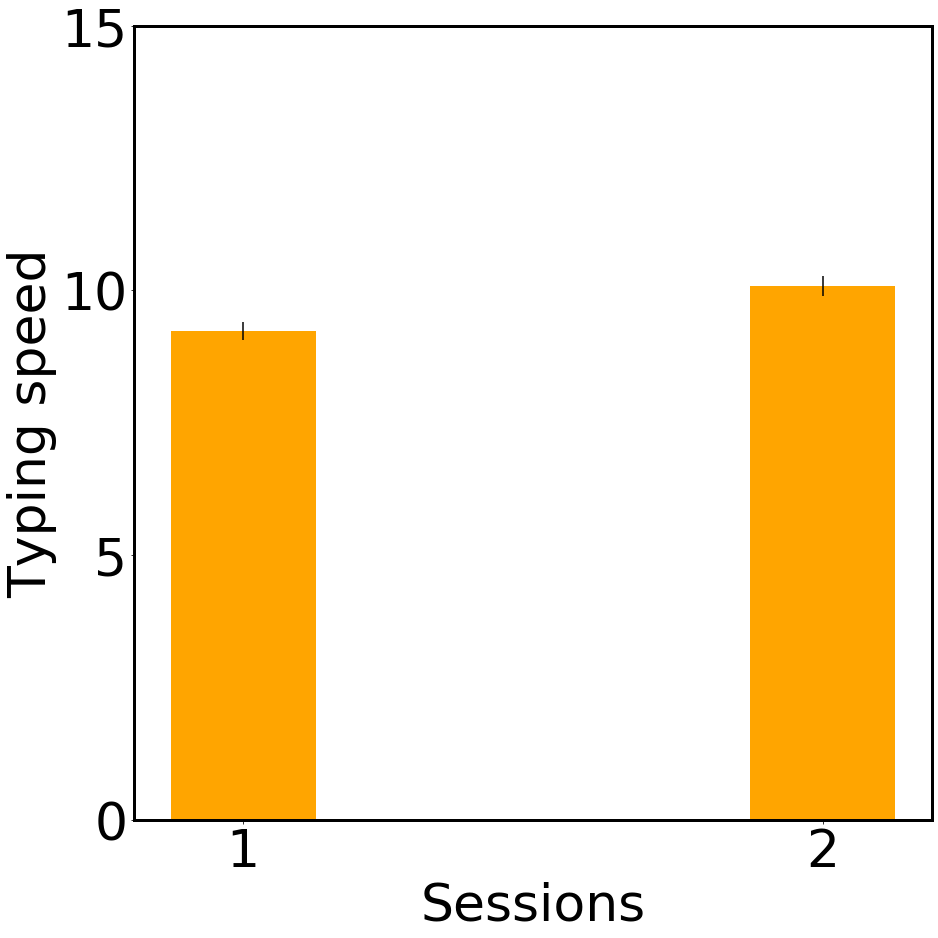

In [14]:
PlotTitle = 'Characters Per Total Time'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CharactersPerTotalTime']



label_fontSize = 72
others_fontSize = 62

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,3]

list1 = list()
x_list1 = list()

variable = 'CharactersPerTotalTime'



for indDay, session in enumerate(np.unique(df1.Session)):


    p1 = ax1.bar(x_inds[indDay], df1[variable][np.logical_and(df1.Session==session, df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==session, df1.TypingTechnique=='DT')].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==session, df1.TypingTechnique=='DT')].count()), \
                 color='orange', label='Easy', width=0.5)
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2'])
ax1.set_ylim([0, 15])
ax1.set_ylabel('Typing speed')
ax1.set_xlabel('Sessions')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\typingSpeed_sessions2.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Typing speed and Language

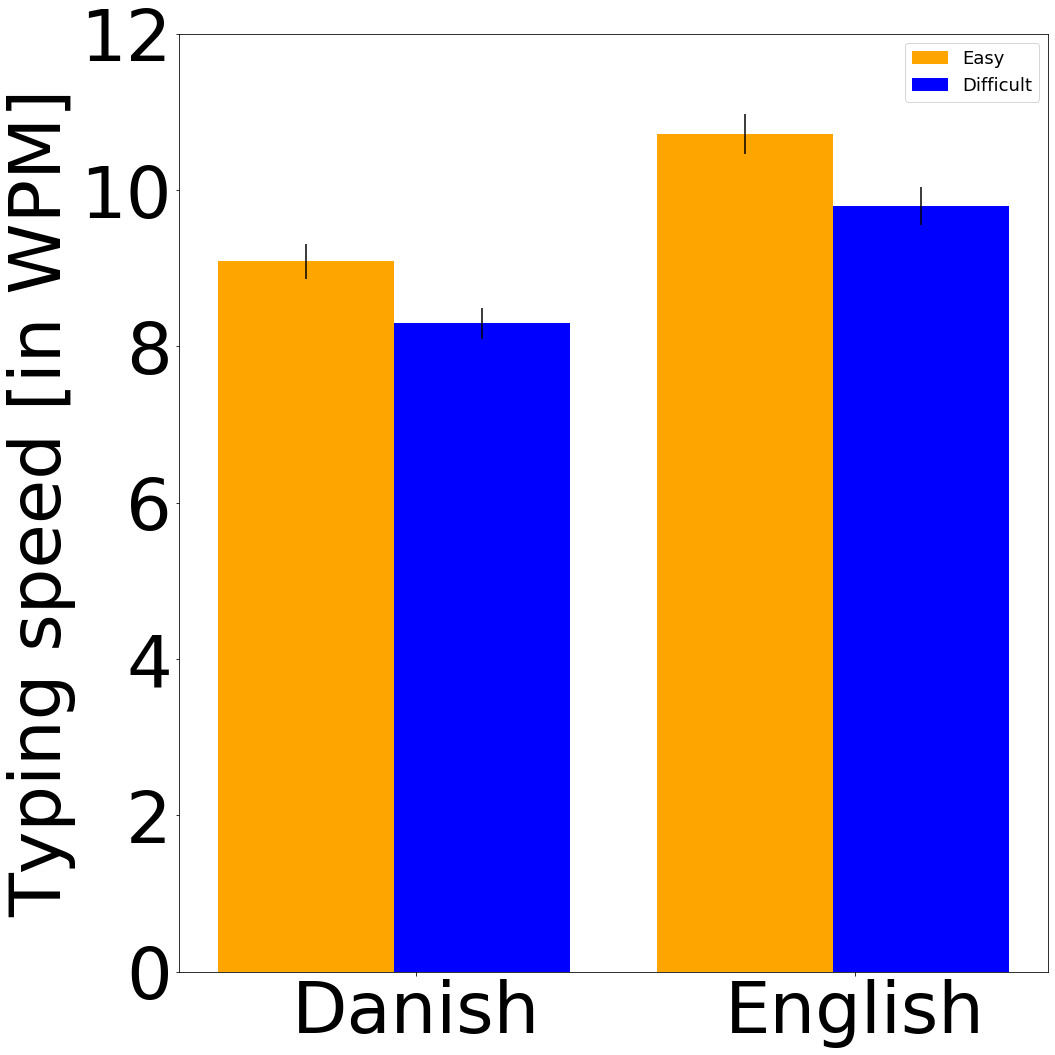

In [12]:
PlotTitle = 'CharactersPerTotalTime'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CharactersPerTotalTime']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA')].mean())
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    p3 = ax1.bar(x_inds[ind+2], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
    p4 = ax1.bar(x_inds[ind+3], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 12])
ax1.set_ylabel('Typing speed [in WPM]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\TypingSpeed_Language_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

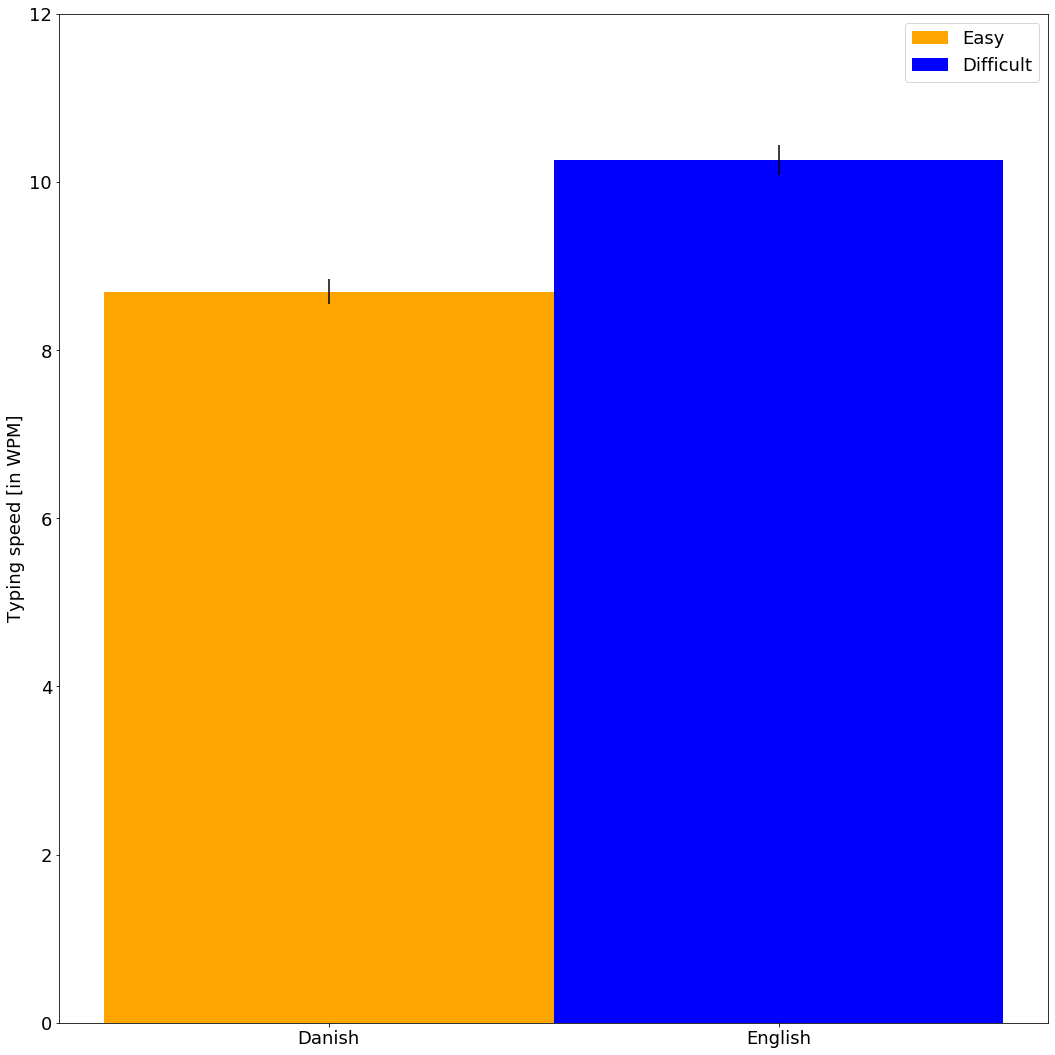

In [13]:
PlotTitle = 'CharactersPerTotalTime'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CharactersPerTotalTime']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.Language=='DA', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Language=='DA', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.Language=='DA', df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(df1.Language=='EN', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Language=='EN', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.Language=='EN', df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1, 1.8])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 12])
ax1.set_ylabel('Typing speed [in WPM]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\TypingSpeed_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Typing speed and time on task

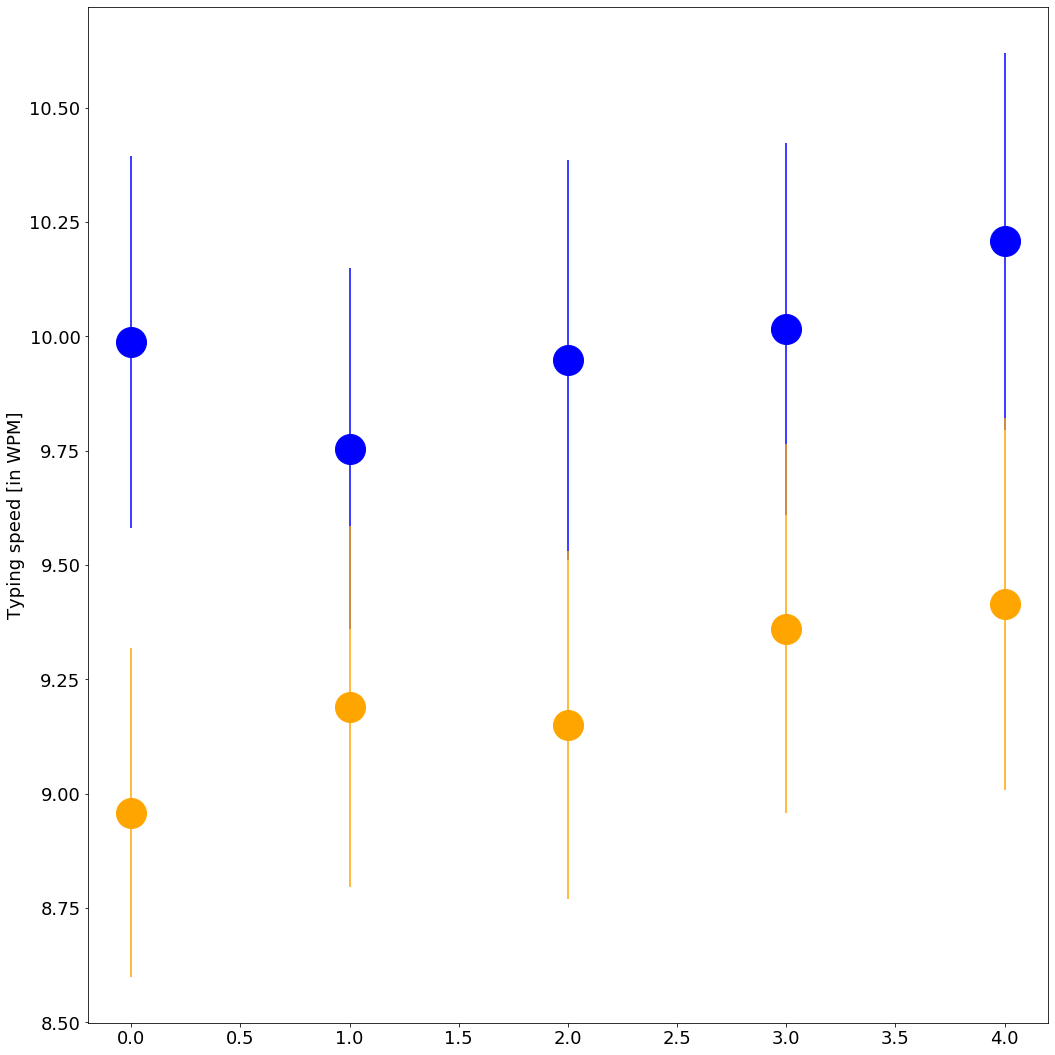

In [28]:
PlotTitle = 'CharactersPerTotalTime'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'CharactersPerTotalTime'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12





list1 = list()
x_list1 = list()

for ind, trial in enumerate(np.unique(df1.Trial)):
    
    if trial > 4:
        continue
    
    p1 = ax1.errorbar(trial, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.SessionDifficulty=='E')].mean(), df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.SessionDifficulty=='E')].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.SessionDifficulty=='E')].count())), marker = 'o', ms=30, color = 'blue')
    p2 = ax1.errorbar(trial, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.SessionDifficulty=='D')].mean(), df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.SessionDifficulty=='D')].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.SessionDifficulty=='D')].count())), marker = 'o', ms=30, color = 'orange')
    
    #p1 = ax1.errorbar(timeOnTask[ind], df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', \
    #            df1.Subject==subject), df1.Trial==str(trial))].mean(), yerr = df1[variable][np.logical_and(np.logical_and\
    #            (df1.TypingTechnique=='DT', df1.Subject==subject), df1.Trial==trial)].std()/np.sqrt(df1[variable][\
    #            np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Subject==subject), df1.Trial==trial)].count()\
    #            ), marker = 'o', color='orange')
    
    
    
    
#ax1.set_ylim([0, 12])
ax1.set_ylabel('Typing speed [in WPM]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2020FatigueResults\TypingSpeed_TimeOnTask.png', dpi = 300, \
            bbox_to_anchor = (0.95, 0.1))

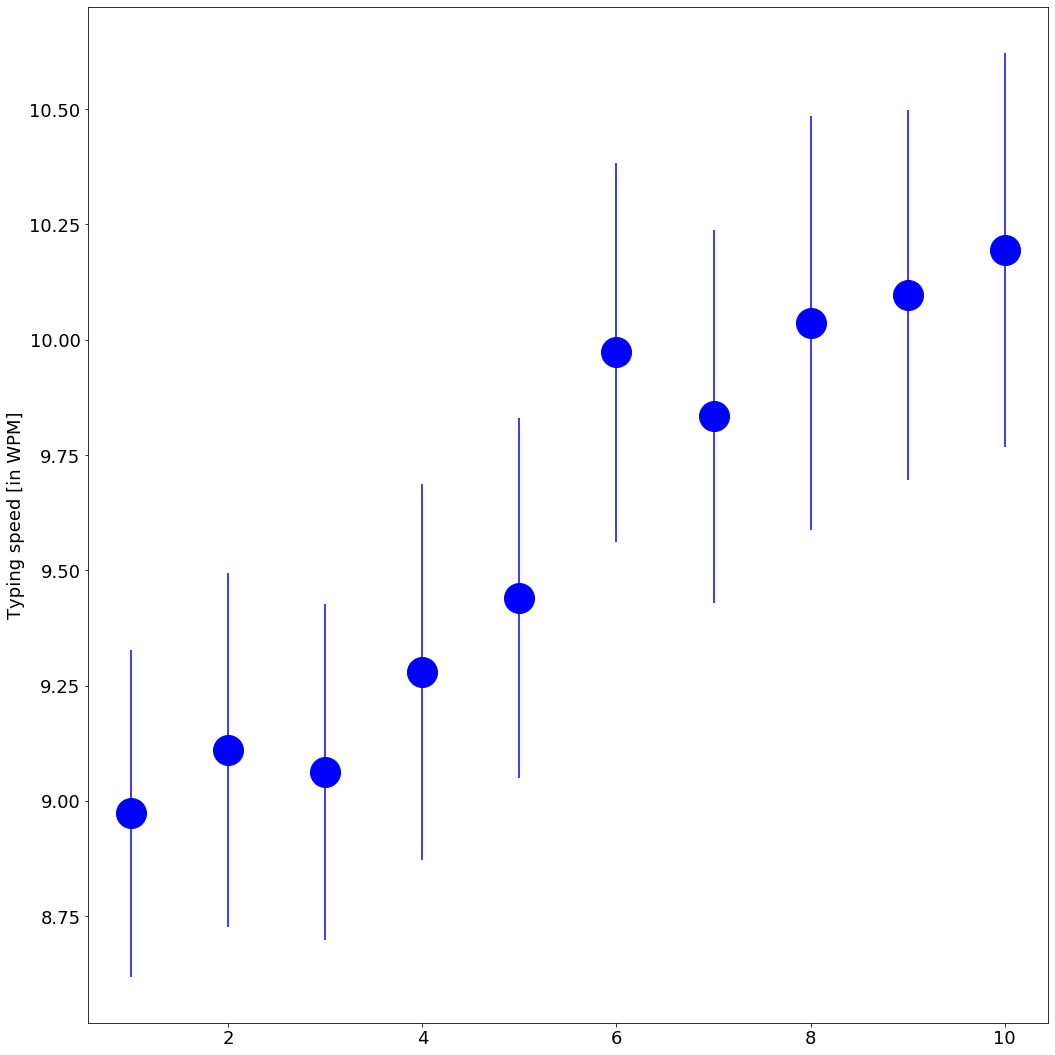

In [39]:
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'CharactersPerTotalTime'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12





list1 = list()
x_list1 = list()

for ind, trial in enumerate(np.unique(df1.Trial)):
    
    if trial > 4:
        continue
    
    p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1)].mean(), df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1)].count())), marker = 'o', ms=30, color = 'blue')
    p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2)].mean(), df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2)].count())), marker = 'o', ms=30, color = 'blue')
    
    #p1 = ax1.errorbar(timeOnTask[ind], df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', \
    #            df1.Subject==subject), df1.Trial==str(trial))].mean(), yerr = df1[variable][np.logical_and(np.logical_and\
    #            (df1.TypingTechnique=='DT', df1.Subject==subject), df1.Trial==trial)].std()/np.sqrt(df1[variable][\
    #            np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Subject==subject), df1.Trial==trial)].count()\
    #            ), marker = 'o', color='orange')
    
    
    
    
#ax1.set_ylim([0, 12])
ax1.set_ylabel('Typing speed [in WPM]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2020FatigueResults\TypingSpeed_TimeOnTask.png', dpi = 300, \
            bbox_to_anchor = (0.95, 0.1))

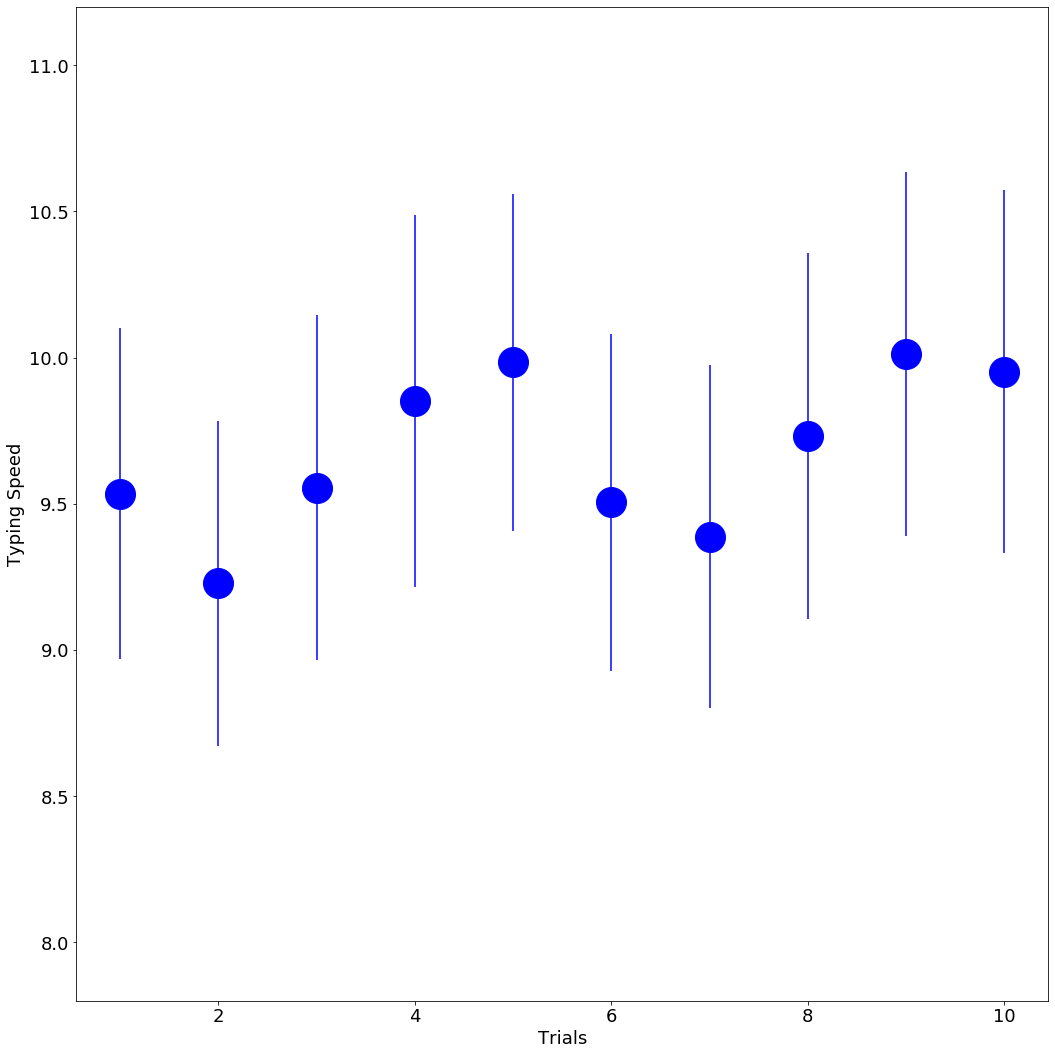

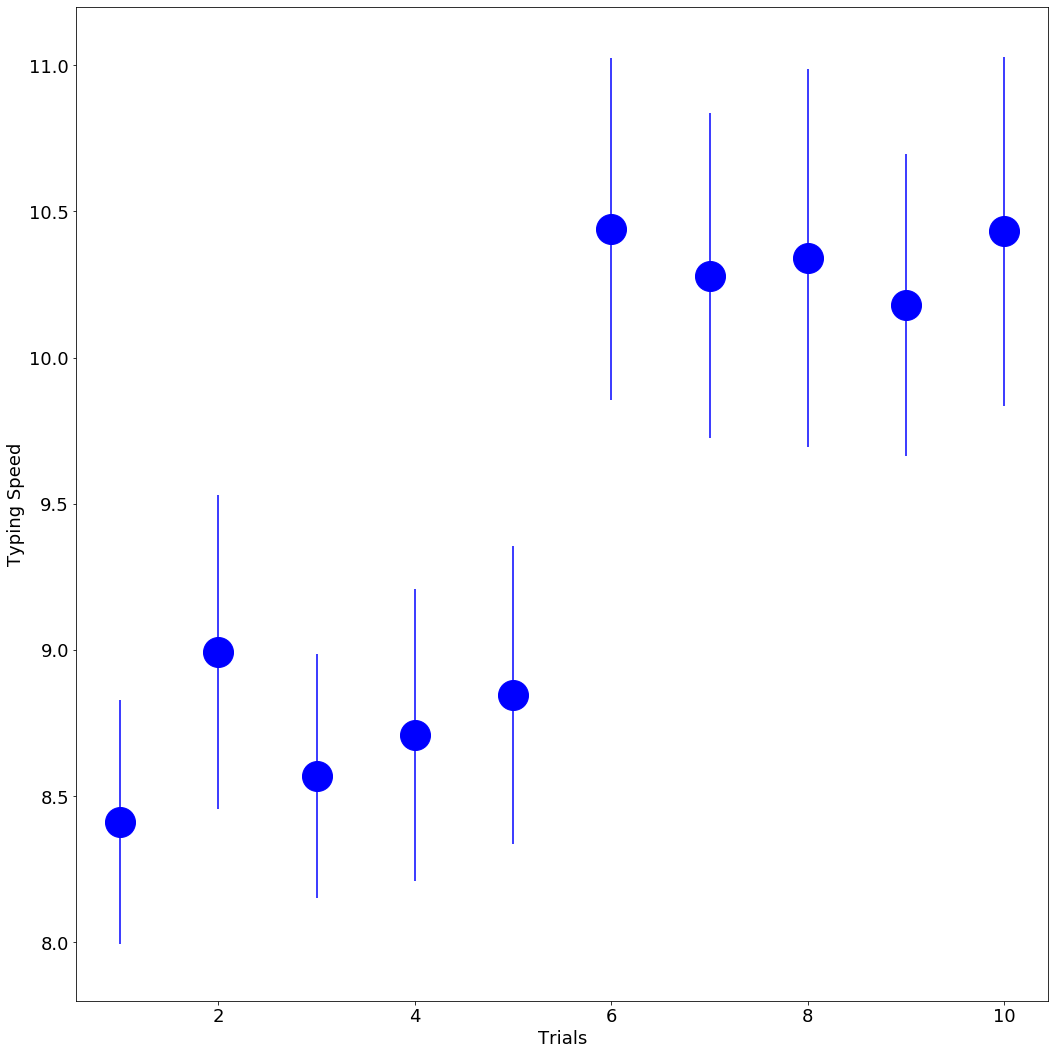

In [62]:


variable = 'CharactersPerTotalTime'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
    
    
    ax1.set_ylabel('Typing Speed')
    ax1.set_xlabel('Trials')
    ax1.set_ylim([7.8, 11.2])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\TypingSpeed_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    
    
ax1.set_ylabel('Typing Speed')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






# Speed vs Accuracy

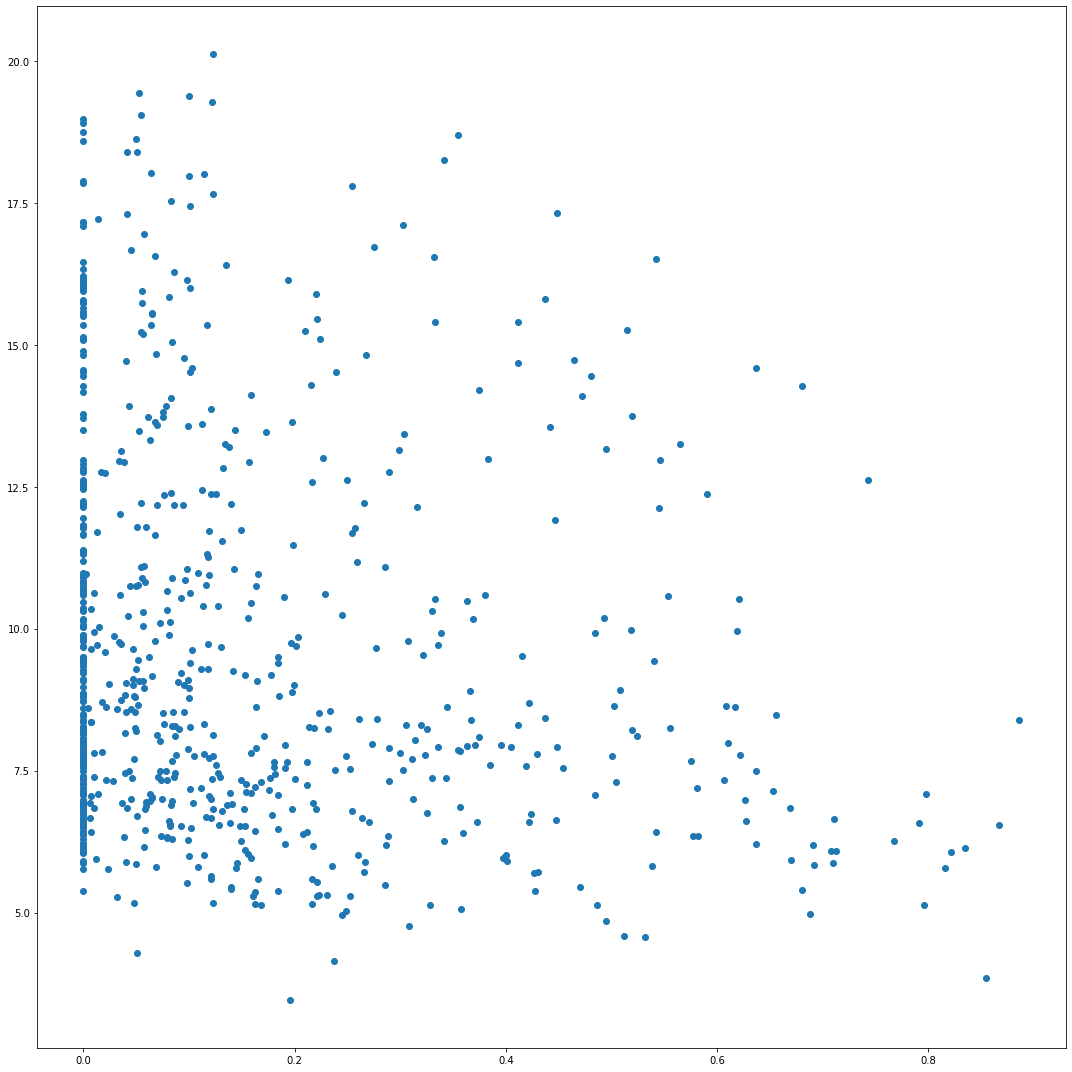

In [6]:
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CharactersPerTotalTime', 'ErrorRate']


ax1.plot(df1[plot_variables[1]][df1.TypingTechnique=='DT'], df1[plot_variables[0]][df1.TypingTechnique=='DT'], 'o')


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\SpeedAccuracy.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))


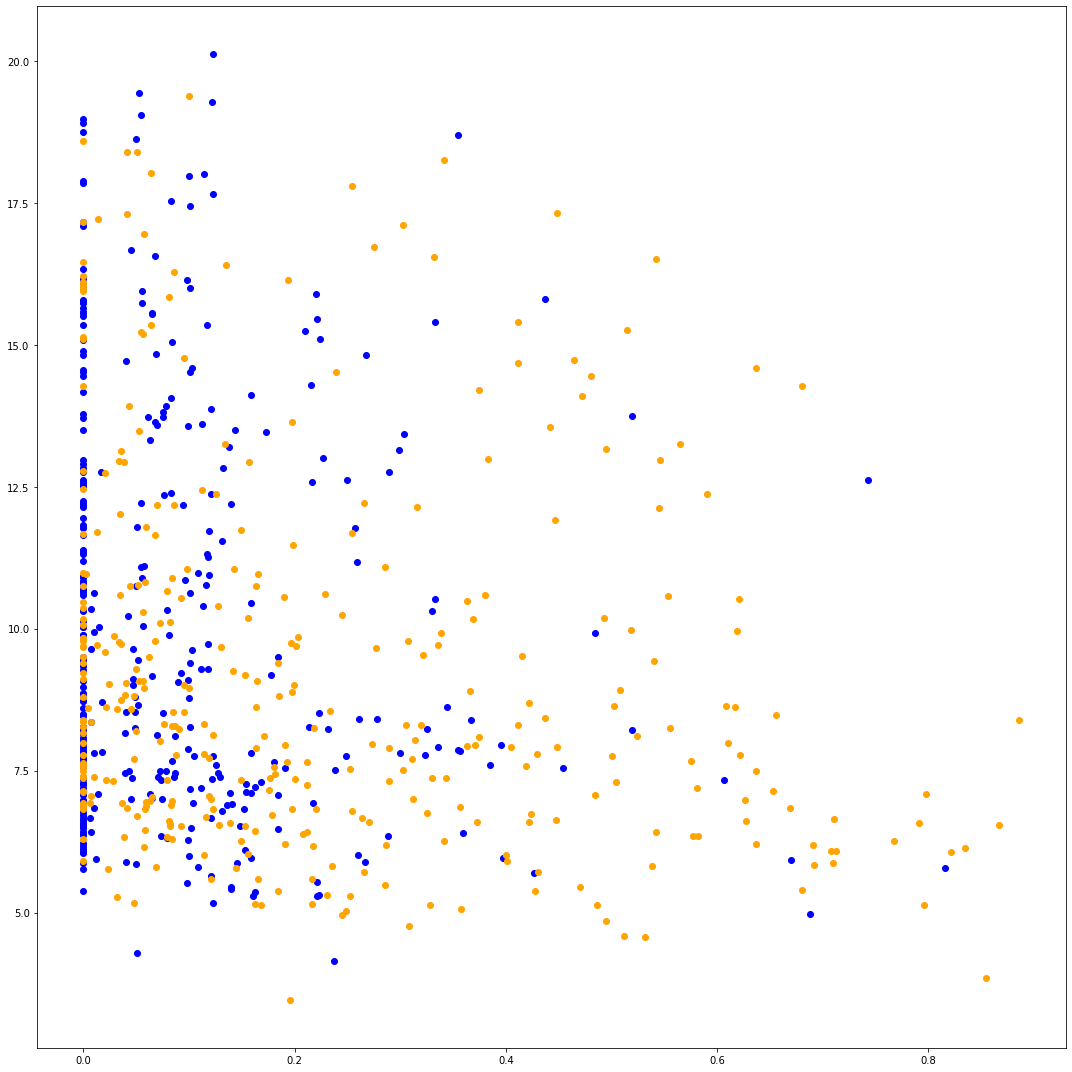

In [15]:
fig = plt.figure(figsize=[15,15])

plot_variables = ['CharactersPerTotalTime', 'ErrorRate']

ax1 = fig.add_subplot()

ax1.plot(df1[plot_variables[1]][np.logical_and(df1.SessionDifficulty=='E',df1.TypingTechnique=='DT')], \
         df1[plot_variables[0]][np.logical_and(df1.SessionDifficulty=='E',df1.TypingTechnique=='DT')], 'o', color ='blue')

ax1.plot(df1[plot_variables[1]][np.logical_and(df1.SessionDifficulty=='D',df1.TypingTechnique=='DT')], \
         df1[plot_variables[0]][np.logical_and(df1.SessionDifficulty=='D',df1.TypingTechnique=='DT')], 'o',color ='orange')



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\SpeedAccuracy_SessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))


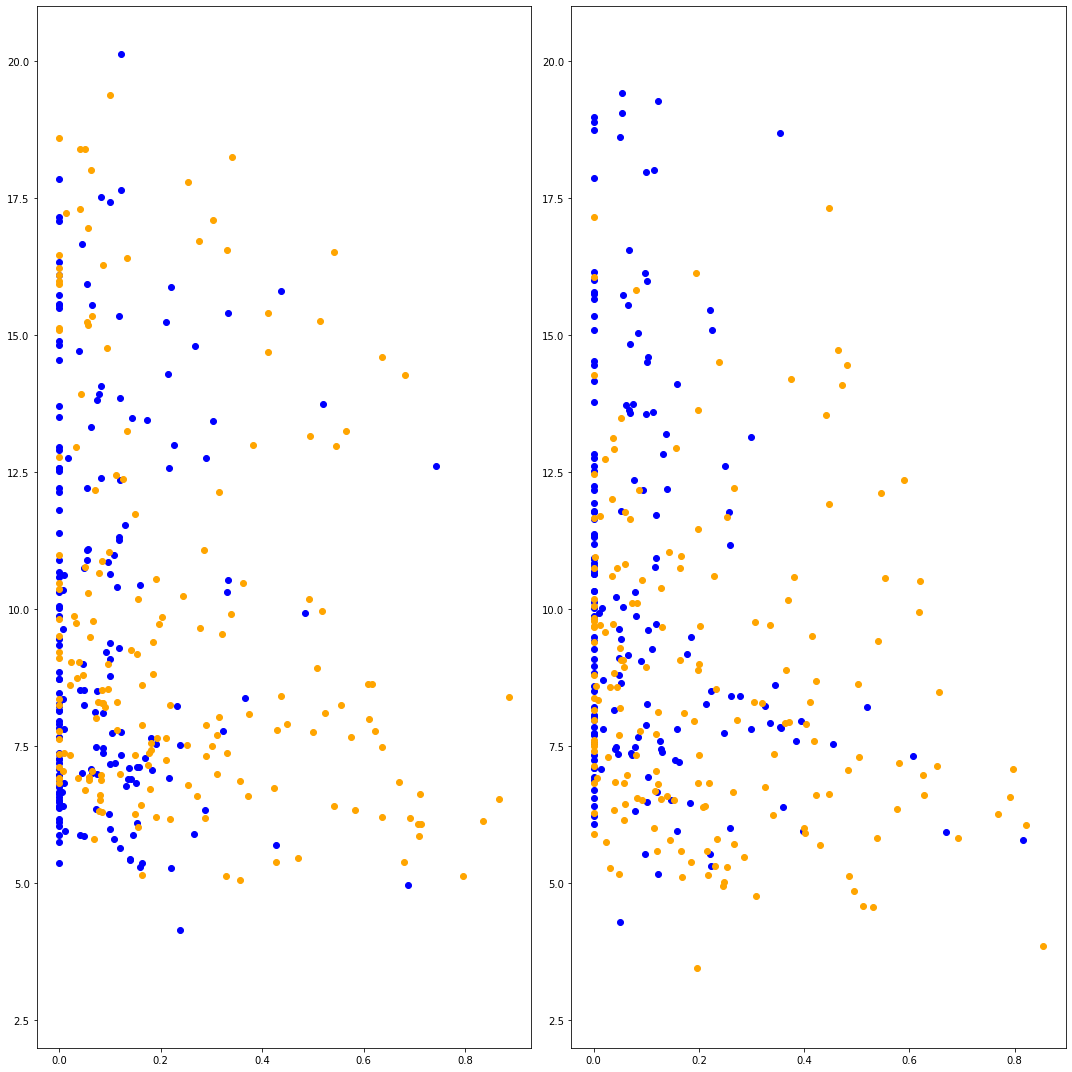

In [20]:
fig = plt.figure(figsize=[15,15])

plot_variables = ['CharactersPerTotalTime', 'ErrorRate']

ax1 = fig.add_subplot(1,2,1)

ax1.plot(df1[plot_variables[1]][np.logical_and(np.logical_and(df1.SessionDifficulty=='E',df1.TypingTechnique=='DT'), \
        df1.Session==1)], df1[plot_variables[0]][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', \
        df1.TypingTechnique=='DT'), df1.Session==1)], 'o', color ='blue')

ax1.plot(df1[plot_variables[1]][np.logical_and(np.logical_and(df1.SessionDifficulty=='D',df1.TypingTechnique=='DT'), 
        df1.Session==2)], df1[plot_variables[0]][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', \
        df1.TypingTechnique=='DT'), df1.Session==2)], 'o',color ='orange')
ax1.set_ylim([2,21])

ax1 = fig.add_subplot(1,2,2)

ax1.plot(df1[plot_variables[1]][np.logical_and(np.logical_and(df1.SessionDifficulty=='E',df1.TypingTechnique=='DT'), df1.Session==2)], \
         df1[plot_variables[0]][np.logical_and(np.logical_and(df1.SessionDifficulty=='E',df1.TypingTechnique=='DT'), df1.Session==2)], 'o', color ='blue')

ax1.plot(df1[plot_variables[1]][np.logical_and(np.logical_and(df1.SessionDifficulty=='D',df1.TypingTechnique=='DT'), df1.Session==1)], \
         df1[plot_variables[0]][np.logical_and(np.logical_and(df1.SessionDifficulty=='D',df1.TypingTechnique=='DT'), df1.Session==1)], 'o',color ='orange')
ax1.set_ylim([2,21])


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\SpeedAccuracy_SessionDifficulty_SessionOrder.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))


In [ ]:



plot_variables = ['CharactersPerTotalTime', 'ErrorRate']


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12



sessionEasy = 1
sessionDifficult = 2

for i in range(0,2):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
        
        accuracy_session1 = 1-df1[plot_variables[1]][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', \
                    df1.Trial==trial), df1.Session==sessionEasy), df1.SessionDifficulty=='E')].mean()
        accuracy_session2 = 1-df1[plot_variables[1]][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', \
                    df1.Trial==trial), df1.Session==sessionDifficult), df1.SessionDifficulty=='E')].mean()
        
        ax.scatter3D(trial+1, accuracy_session1, df1[plot_variables[0]][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique==\
                    'DT', df1.Trial==trial), df1.Session==sessionEasy), df1.SessionDifficulty=='E')].mean(), \
                    color='blue')
        ax.scatter3D(trial+1, accuracy_session2, df1[plot_variables[0]][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique==\
                    'DT', df1.Trial==trial), df1.Session==sessionDifficult), df1.SessionDifficulty=='D')].mean(), \
                    color='orange')
        
        ax.set_xlabel('Trial')
        ax.set_ylabel('Accuracy')
        ax.set_zlabel('Speed')
        
        ax.set_zlim([8.5, 10.5])
        ax.set_ylim([0,1])
        title = 'Easy: ' + str(sessionEasy)
        ax.set_title(title)
        
        """
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
    
    
    ax1.set_ylabel('Typing Speed')
    ax1.set_xlabel('Trials')
    ax1.set_ylim([7.8, 11.2])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\TypingSpeed_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    """
    sessionEasy = 2
    sessionDifficult = 1
    

        

#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))





In [95]:



plot_variables = ['CharactersPerTotalTime', 'ErrorRate']


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12



sessionEasy = 1
sessionDifficult = 2

for i in range(0,2):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)


    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
        
        accuracy_session1 = 1-df1[plot_variables[1]][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', \
                    df1.Trial==trial), df1.Session==sessionEasy), df1.SessionDifficulty=='E')].mean()
        accuracy_session2 = 1-df1[plot_variables[1]][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', \
                    df1.Trial==trial), df1.Session==sessionDifficult), df1.SessionDifficulty=='E')].mean()
        
        
        
        p1 = ax.errorbar(accuracy_session1, df1[plot_variables[0]][np.logical_and(np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Trial==trial), df1.Session==sessionEasy), df1.SessionDifficulty=='E')]\
                    .mean(), \
                         
                    xerr = df1[plot_variables[1]][np.logical_and(np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Trial==trial), df1.Session==sessionEasy), df1.SessionDifficulty=='E')]\
                    .std()/(np.sqrt(df1[plot_variables[1]][np.logical_and(np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Trial==trial), df1.Session==sessionEasy), df1.SessionDifficulty=='E')]\
                    .count())), \
                    yerr = df1[plot_variables[0]][np.logical_and(np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Trial==trial), df1.Session==sessionEasy), df1.SessionDifficulty=='E')]\
                    .std()/(np.sqrt(df1[plot_variables[0]][np.logical_and(np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Trial==trial), df1.Session==sessionEasy), df1.SessionDifficulty=='E')]\
                    .count())), marker = 'o', color='blue')
       
        p2 = ax.errorbar(accuracy_session2, df1[plot_variables[0]][np.logical_and(np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Trial==trial), df1.Session==sessionDifficult), df1.SessionDifficulty=='D')]\
                    .mean(), \
                         
                    xerr = df1[plot_variables[1]][np.logical_and(np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Trial==trial), df1.Session==sessionDifficult), df1.SessionDifficulty=='D')]\
                    .std()/(np.sqrt(df1[plot_variables[1]][np.logical_and(np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Trial==trial), df1.Session==sessionDifficult), df1.SessionDifficulty=='D')]\
                    .count())), \
                    yerr = df1[plot_variables[0]][np.logical_and(np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Trial==trial), df1.Session==sessionDifficult), df1.SessionDifficulty=='D')]\
                    .std()/(np.sqrt(df1[plot_variables[0]][np.logical_and(np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Trial==trial), df1.Session==sessionDifficult), df1.SessionDifficulty=='D')]\
                    .count())), marker = 'o', color='orange')
        
        
        
    
        
        
        
        ax.set_xlabel('Accuracy')
        ax.set_ylabel('Speed')
        
        
        ax.set_ylim([7.8, 11.2])
        ax.set_xlim([0.83,0.98])
        title = 'Easy: ' + str(sessionEasy)
        ax.set_title(title)
        ax.legend((p1[0],p2[0]), ('Easy', 'Difficult'))
     
    
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\SpeedAccuracy_' + 'Session' + str(sessionEasy) + '_' + \
    'Easy' + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    
    sessionEasy = 2
    sessionDifficult = 1
    

        

#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))





# Error rate

In [14]:
variable = 'ErrorRate'

# sDiff

print('sDiff')
print('E', np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])))
print('D',np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])))


# Day
print('Day')
day1_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)]))
day1_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])))
day2_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)]))
day2_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])))
day3_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)]))
day3_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])))
day4_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)]))
day4_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])))

day_m = [day2_m-day1_m, day3_m-day2_m, day4_m-day3_m]
day_s = [np.sqrt(day1_s**2+day2_s**2), np.sqrt(day2_s**2 + day3_s**2), np.sqrt(day3_s**2+day4_s**2)]
print(day_m)
print(np.mean(day_m))
print(day_s)
print(np.mean(day_s))


# Day
print('Day Easy')
day1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.SessionDifficulty=='E')]))
day1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.SessionDifficulty=='E')])))
day2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.SessionDifficulty=='E')]))
day2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.SessionDifficulty=='E')])))
day3_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.SessionDifficulty=='E')]))
day3_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.SessionDifficulty=='E')])))
day4_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.SessionDifficulty=='E')]))
day4_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.SessionDifficulty=='E')])))

day_m = [day2_m-day1_m, day3_m-day2_m, day4_m-day3_m]
day_s = [np.sqrt(day1_s**2+day2_s**2), np.sqrt(day2_s**2 + day3_s**2), np.sqrt(day3_s**2+day4_s**2)]
print(day_m)
print(np.mean(day_m))
print(day_s)
print(np.mean(day_s))

# Day
print('Day Difficult')
day1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.SessionDifficulty=='D')]))
day1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.SessionDifficulty=='D')])))
day2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.SessionDifficulty=='D')]))
day2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.SessionDifficulty=='D')])))
day3_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.SessionDifficulty=='D')]))
day3_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.SessionDifficulty=='D')])))
day4_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.SessionDifficulty=='D')]))
day4_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.SessionDifficulty=='D')])))

day_m = [day2_m-day1_m, day3_m-day2_m, day4_m-day3_m]
day_s = [np.sqrt(day1_s**2+day2_s**2), np.sqrt(day2_s**2 + day3_s**2), np.sqrt(day3_s**2+day4_s**2)]
print(day_m)
print(np.mean(day_m))
print(day_s)
print(np.mean(day_s))

# Session
print('Session')
print(np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==2)])-np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==1)]))
session2_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==2)])))
session1_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==1)])))
print(np.sqrt(session1_s**2+session2_s**2))


sDiff
E 0.09283483050408046
0.006705795117845043
D 0.22714466351592458
0.011559133185912975
Day
[-0.02616754088858292, -0.009027453901670701, -0.03396396437889014]
-0.023052986389714588
[0.021154359816961014, 0.019878928223104636, 0.018460650708296063]
0.01983131291612057
Day Easy
[-0.0008422263682104636, 0.006029558136254956, -0.041069503486995035]
-0.011960723906316847
[0.01910704354352343, 0.02017539366334491, 0.01829412270971918]
0.019192186638862505
Day Difficult
[-0.05937523984715776, -0.022249046250686744, -0.027322731376612314]
-0.0363156724914856
[0.03409490945935762, 0.031979434289049015, 0.03007891808442492]
0.03205108727761052
Session
0.009385902938306628
0.014182999212316572


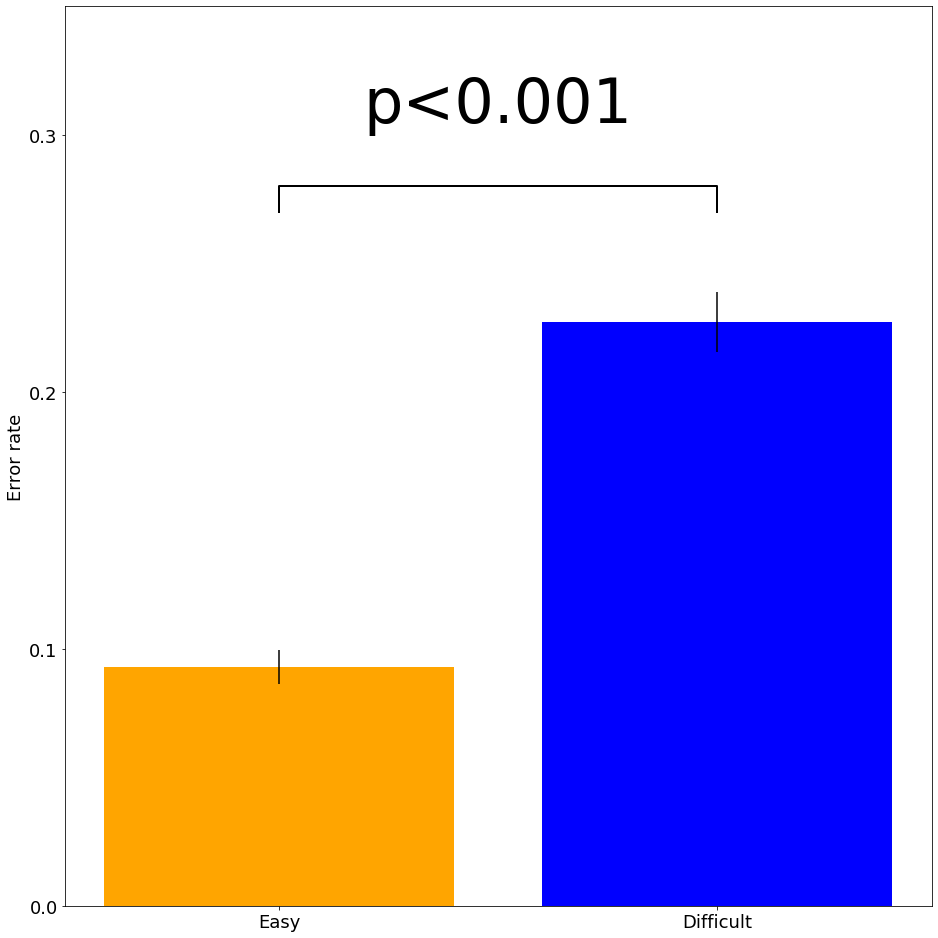

In [14]:
PlotTitle = 'Error Rate'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ErrorRate']

label_fontSize = 72
others_fontSize = 62


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 0.35])
ax1.set_ylabel('Uncorrected error rate [%]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level
maxTime = 0.27
y_time, h, col = maxTime, 0.01, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\errorRate.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Error rate and language

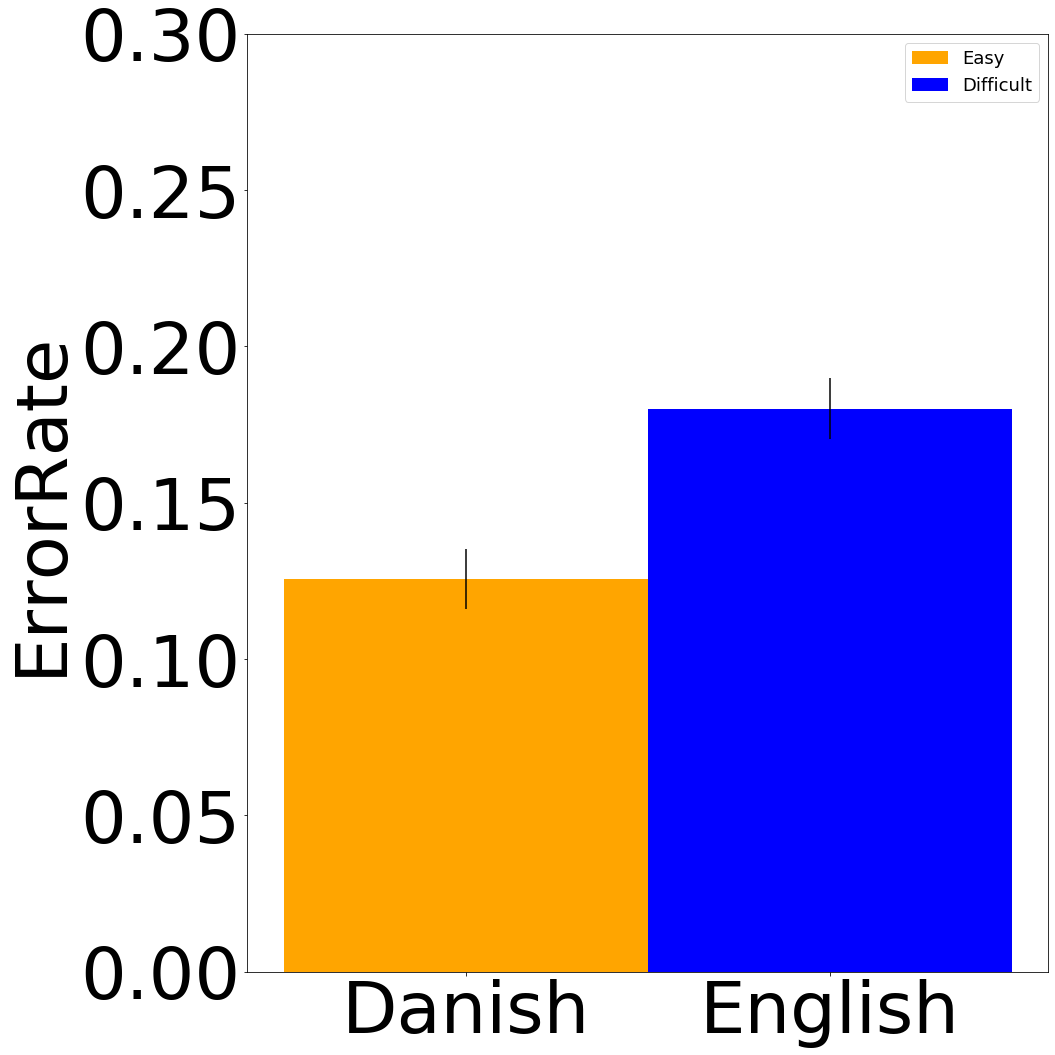

In [15]:
PlotTitle = 'ErrorRate'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ErrorRate']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.Language=='DA', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Language=='DA', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.Language=='DA', df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(df1.Language=='EN', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Language=='EN', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.Language=='EN', df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1, 1.8])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 0.3])
ax1.set_ylabel('ErrorRate')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\ErrorRate_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Error rate over blocks

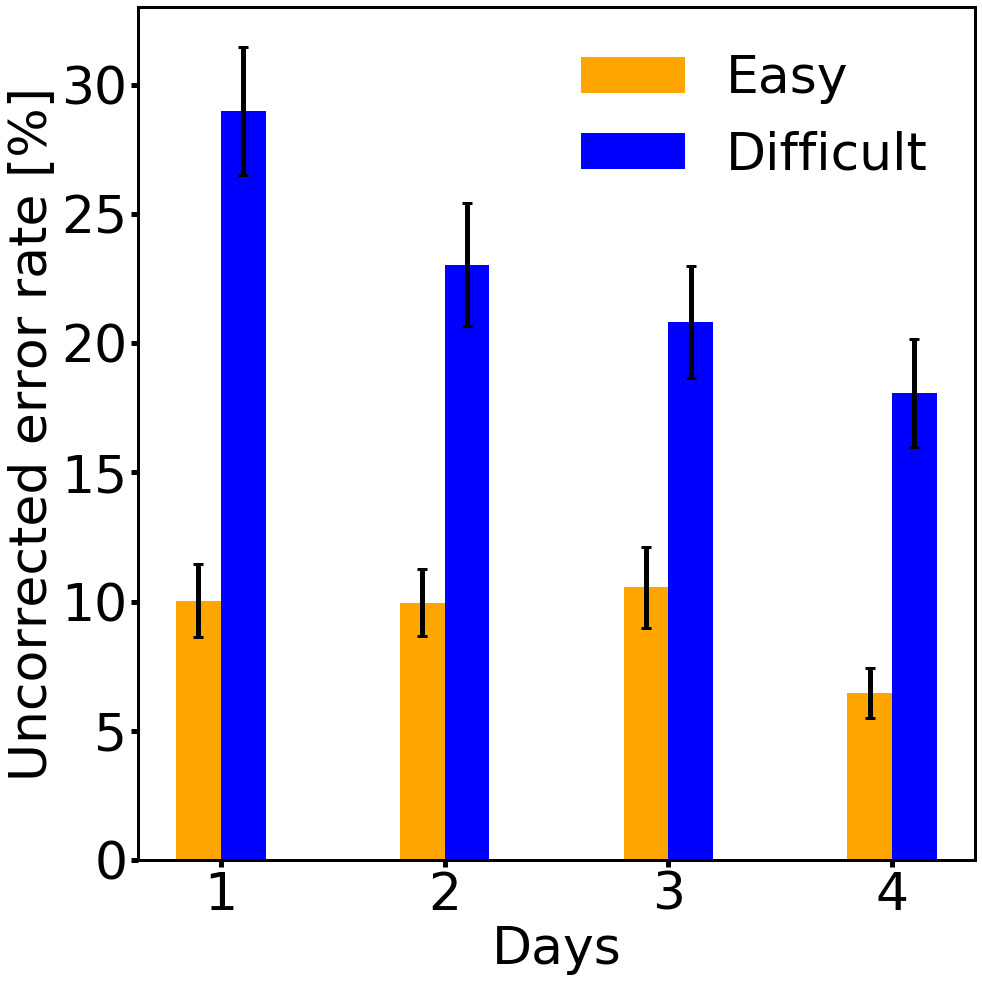

In [13]:
PlotTitle = 'Error rate'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ErrorRate']



label_fontSize = 42
others_fontSize = 32

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'ErrorRate'



for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue

    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].mean()*100, yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].std()*100/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5, error_kw=dict(lw=5, capsize=5, capthick=3))
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].mean()*100, \
                 yerr = df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].std()*100/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5, error_kw=dict(lw=5, capsize=5, capthick=3))
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 33])
ax1.set_ylabel('Uncorrected error rate [%]')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 52})
ax1.legend((p1, p2), ('Easy', 'Difficult'), frameon=False)

mpl.rcParams['axes.linewidth'] = 3
ax = plt.gca()
ax.tick_params(width=5, length = 7)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\errorRate_blocks.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Error rate over blocks and sessions

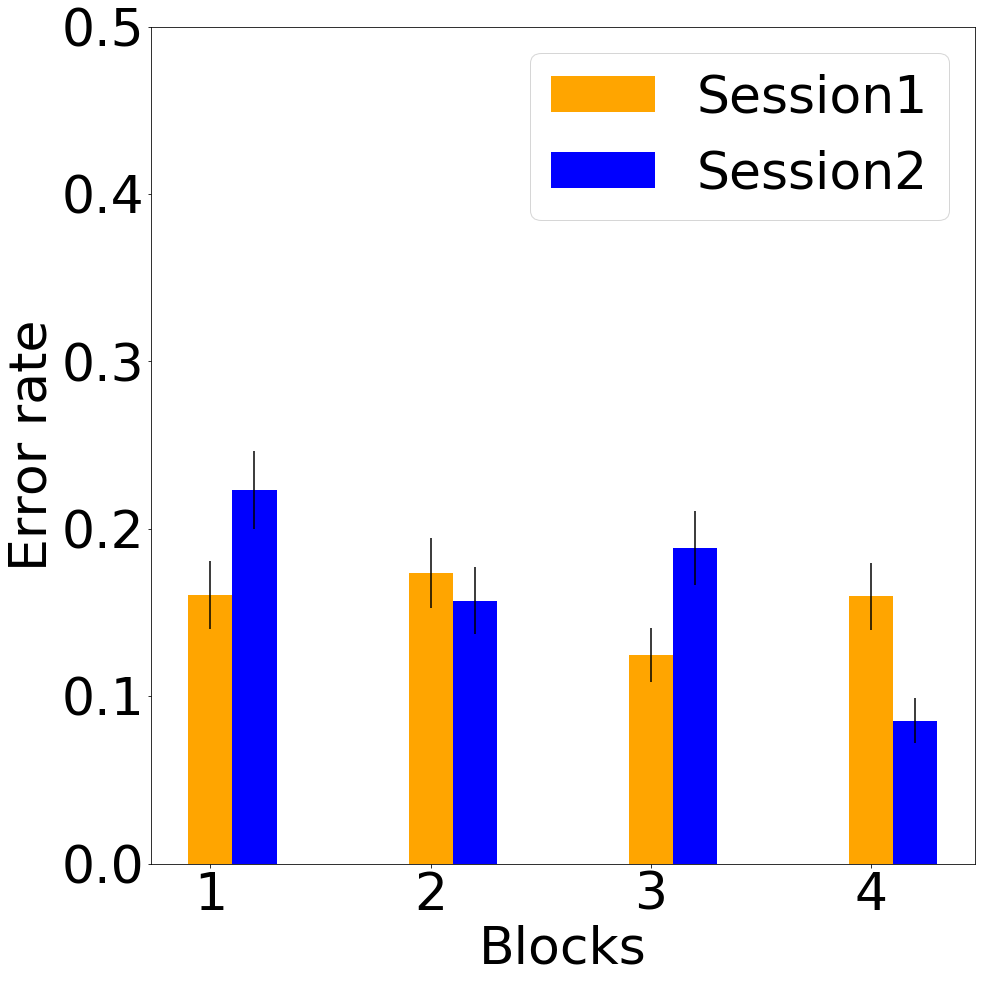

In [26]:
PlotTitle = 'Error rate'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ErrorRate']



label_fontSize = 18
others_fontSize = 12

#boxplot = df1[np.logical_and(df1.Session==1, df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'ErrorRate'



for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue

    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 0.5])
ax1.set_ylabel('Error rate')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 52})
ax1.legend((p1, p2), ('Session1', 'Session2'))
#plt.rcParams.update({'font.size': 32})


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\errorRate_blocks_sessions.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Error rate over 5 blocks, both Dwell-time selection and Multi-key selection

In [65]:
PlotTitle = 'Error rate'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ErrorRate']



label_fontSize = 18
others_fontSize = 12

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayNr==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5, 11]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'ErrorRate'



for indDay, day in enumerate(np.unique(df1.DayNr)):
    

    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayNr==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayNr==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayNr==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayNr==day)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayNr==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayNr==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4', '5'])
ax1.set_ylim([0, 0.4])
ax1.set_ylabel('Error rate')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\errorRate_blocks_DTnMS.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Error rate over sessions

In [58]:
PlotTitle = 'Characters Per Total Time'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ErrorRate']



label_fontSize = 72
others_fontSize = 62

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,3]

list1 = list()
x_list1 = list()

variable = 'ErrorRate'



for indDay, session in enumerate(np.unique(df1.Session)):


    p1 = ax1.bar(x_inds[indDay], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay]+0.5, df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.Session==session)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.Session==session)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.Session==session)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.25])
ax1.set_xticklabels(['1', '2'])
ax1.set_ylim([0, 0.6])
ax1.set_ylabel('Error rate')
ax1.set_xlabel('Sessions')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\errorRate_sessions.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Error rate for every subject

In [92]:
PlotTitle = 'Error Rate'


plot_variables = ['ErrorRate']

label_fontSize = 10
others_fontSize = 8


#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.Subject==subject)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5, 11]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, subject in enumerate(np.unique(df1.Subject)):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    for indDay, day in enumerate(np.unique(df1.DayNr)):
        p1 = ax1.bar(x_inds[indDay], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Subject==subject), df1.DayNr==day)].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Subject==subject), df1.DayNr==day)].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Subject==subject), df1.DayNr==day)].count()), color='orange', label='Easy', width=0.4)
    
        p2 = ax1.bar(x_inds[indDay]+0.5, df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Subject==subject), df1.DayNr==day)].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Subject==subject), df1.DayNr==day)].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Subject==subject), df1.DayNr==day)].count()), color='blue', label='Difficult', width=0.4)
    
    ax1.set_title(subject)
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4', '5'])
ax1.set_ylabel('Error rate')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))





plt.tight_layout()
#fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\errorRate.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Error rate over time on task

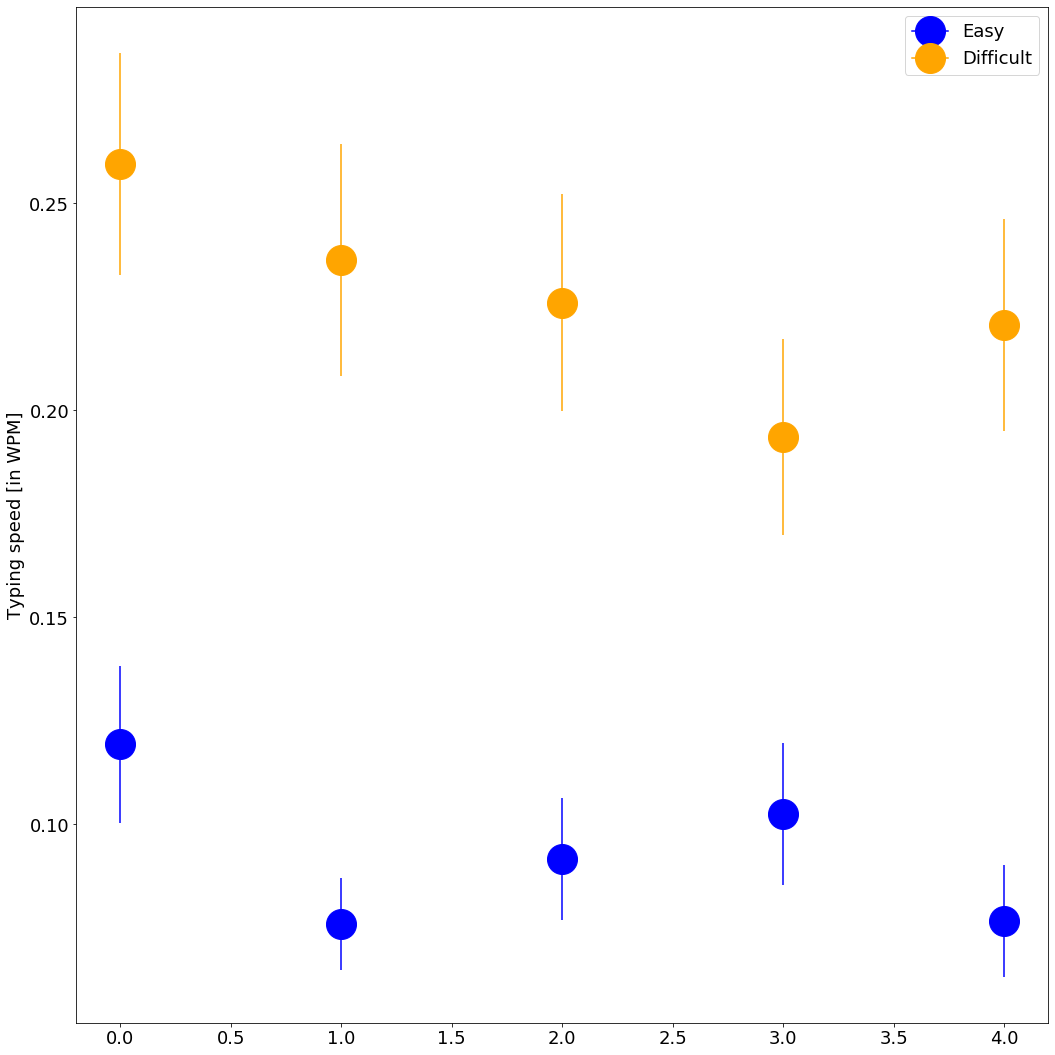

In [30]:
PlotTitle = 'ErrorRate'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'ErrorRate'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12





list1 = list()
x_list1 = list()

for ind, trial in enumerate(np.unique(df1.Trial)):
    
    if trial > 4:
        continue
    
    p1 = ax1.errorbar(trial, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.SessionDifficulty=='E')].mean(), df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.SessionDifficulty=='E')].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.SessionDifficulty=='E')].count())), marker = 'o', ms=30, color = 'blue')
    p2 = ax1.errorbar(trial, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.SessionDifficulty=='D')].mean(), df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.SessionDifficulty=='D')].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.SessionDifficulty=='D')].count())), marker = 'o', ms=30, color = 'orange')
    
    #p1 = ax1.errorbar(timeOnTask[ind], df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', \
    #            df1.Subject==subject), df1.Trial==str(trial))].mean(), yerr = df1[variable][np.logical_and(np.logical_and\
    #            (df1.TypingTechnique=='DT', df1.Subject==subject), df1.Trial==trial)].std()/np.sqrt(df1[variable][\
    #            np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Subject==subject), df1.Trial==trial)].count()\
    #            ), marker = 'o', color='orange')
    
    
    
    
#ax1.set_ylim([0, 12])
ax1.set_ylabel('Error Rate')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2020FatigueResults\ErrorRate_TimeOnTask.png', dpi = 300, \
            bbox_to_anchor = (0.95, 0.1))

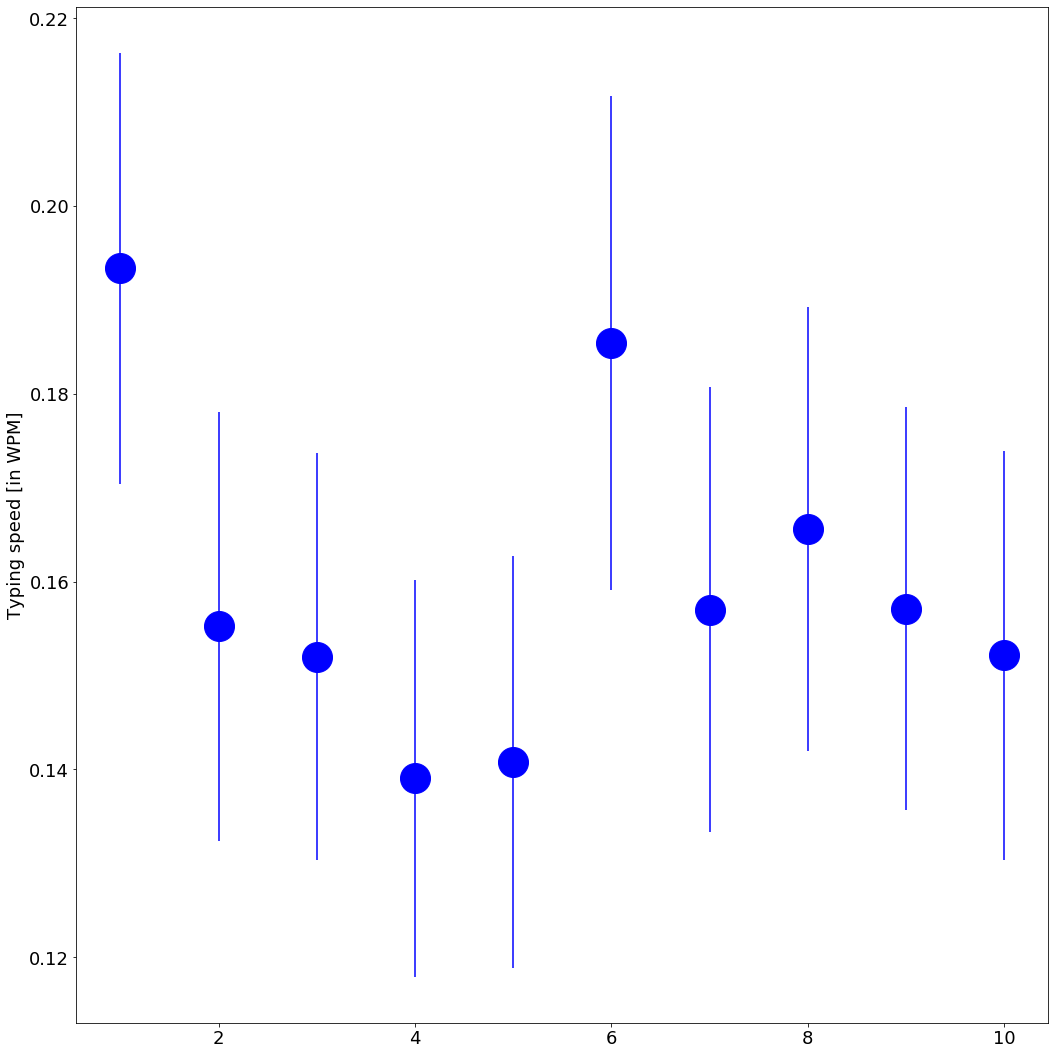

In [38]:
PlotTitle = 'ErrorRate'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'ErrorRate'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12





list1 = list()
x_list1 = list()

for ind, trial in enumerate(np.unique(df1.Trial)):
    
    if trial > 4:
        continue
    
    p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1)].mean(), df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1)].count())), marker = 'o', ms=30, color = 'blue')
    p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2)].mean(), df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2)].count())), marker = 'o', ms=30, color = 'blue')
    
    #p1 = ax1.errorbar(timeOnTask[ind], df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', \
    #            df1.Subject==subject), df1.Trial==str(trial))].mean(), yerr = df1[variable][np.logical_and(np.logical_and\
    #            (df1.TypingTechnique=='DT', df1.Subject==subject), df1.Trial==trial)].std()/np.sqrt(df1[variable][\
    #            np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Subject==subject), df1.Trial==trial)].count()\
    #            ), marker = 'o', color='orange')
    
    
    
    
#ax1.set_ylim([0, 12])
ax1.set_ylabel('Error Rate')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2020FatigueResults\ErrorRate_TimeOnTask.png', dpi = 300, \
            bbox_to_anchor = (0.95, 0.1))

In [53]:


variable = 'ErrorRate'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
session1Color = 'blue'
session2Color = 'orange'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = session1Color)
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = session2Color)
    
    ax1.set_ylabel('Error Rate')
    ax1.set_xlabel('Trials')
    ax1.set_ylim([0.05, 0.32])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\ErrorRate_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    session1Color = 'orange'
    session2Color = 'blue'
    
ax1.set_ylabel('Error Rate')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






# time after trials

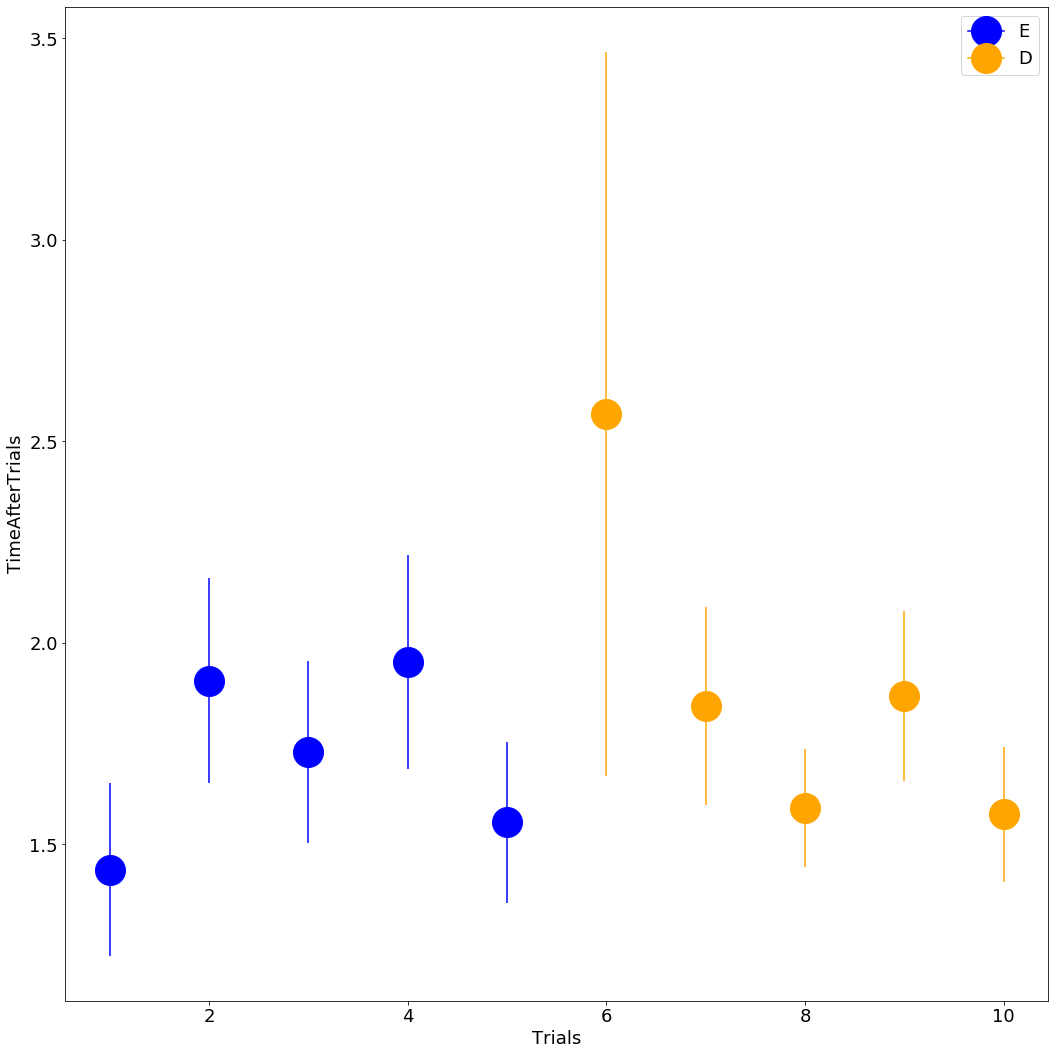

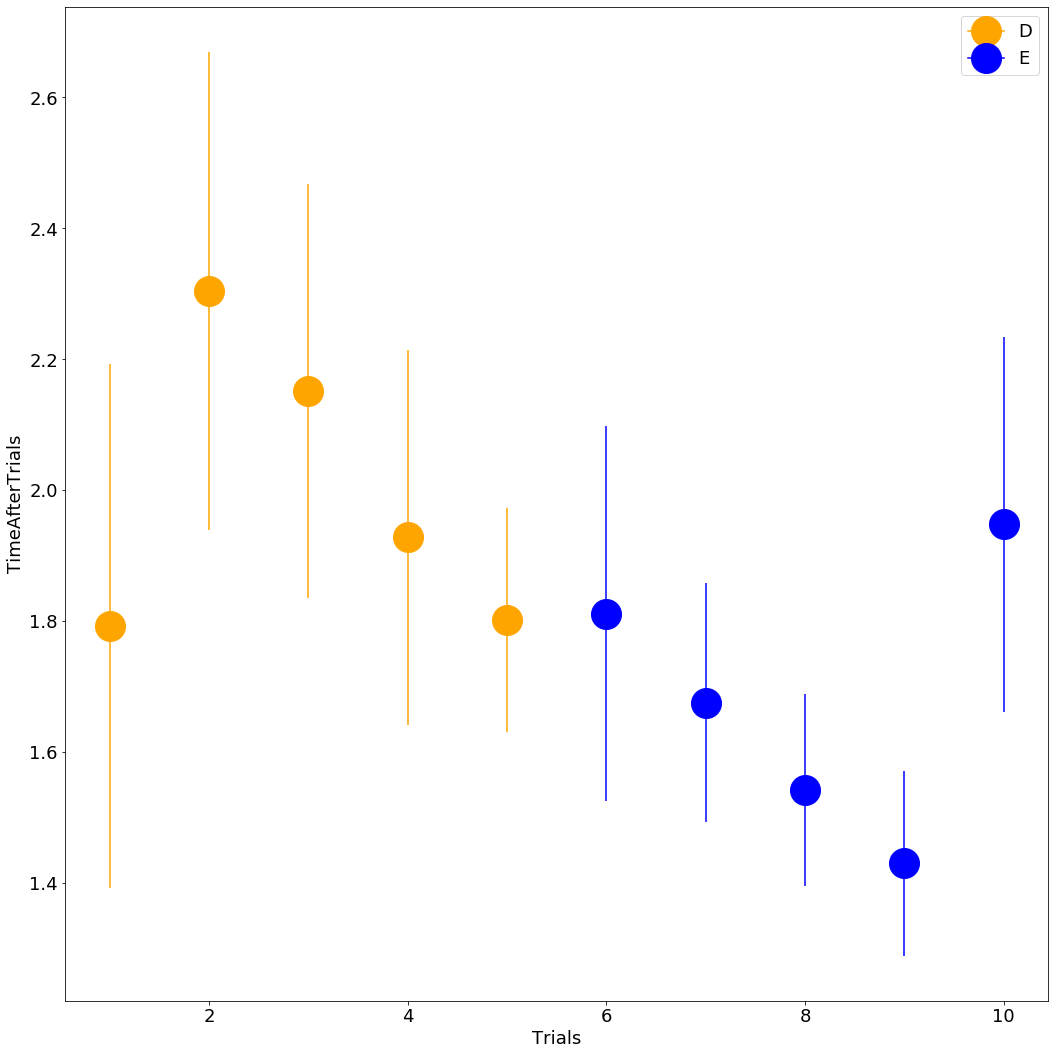

In [7]:


variable = 'TimeAfterTrials'



timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
session1Color = 'blue'
session2Color = 'orange'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = session1Color)
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = session2Color)
    
    ax1.set_ylabel('TimeAfterTrials')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([0.05, 0.32])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1, p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\TimeAfterTrials_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    session1Color = 'orange'
    session2Color = 'blue'
    
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






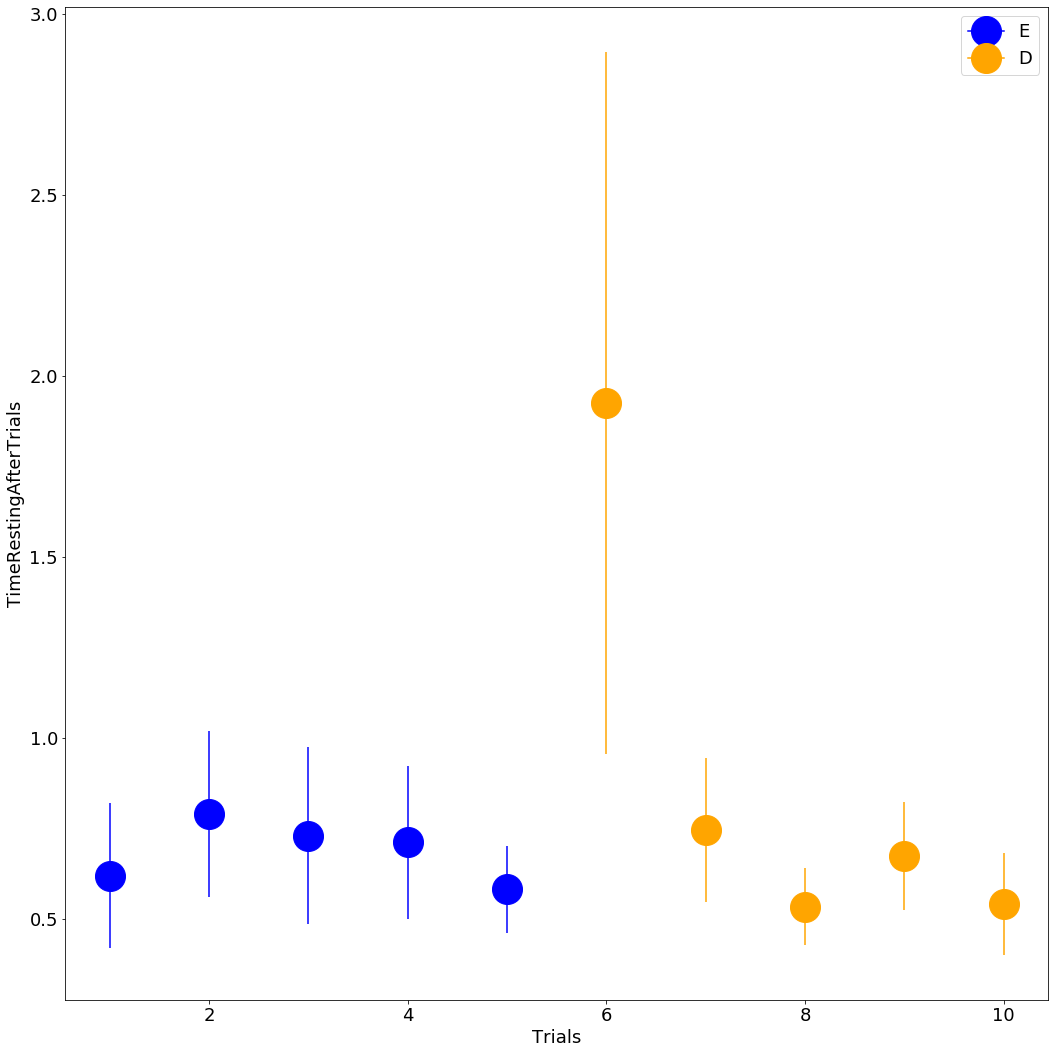

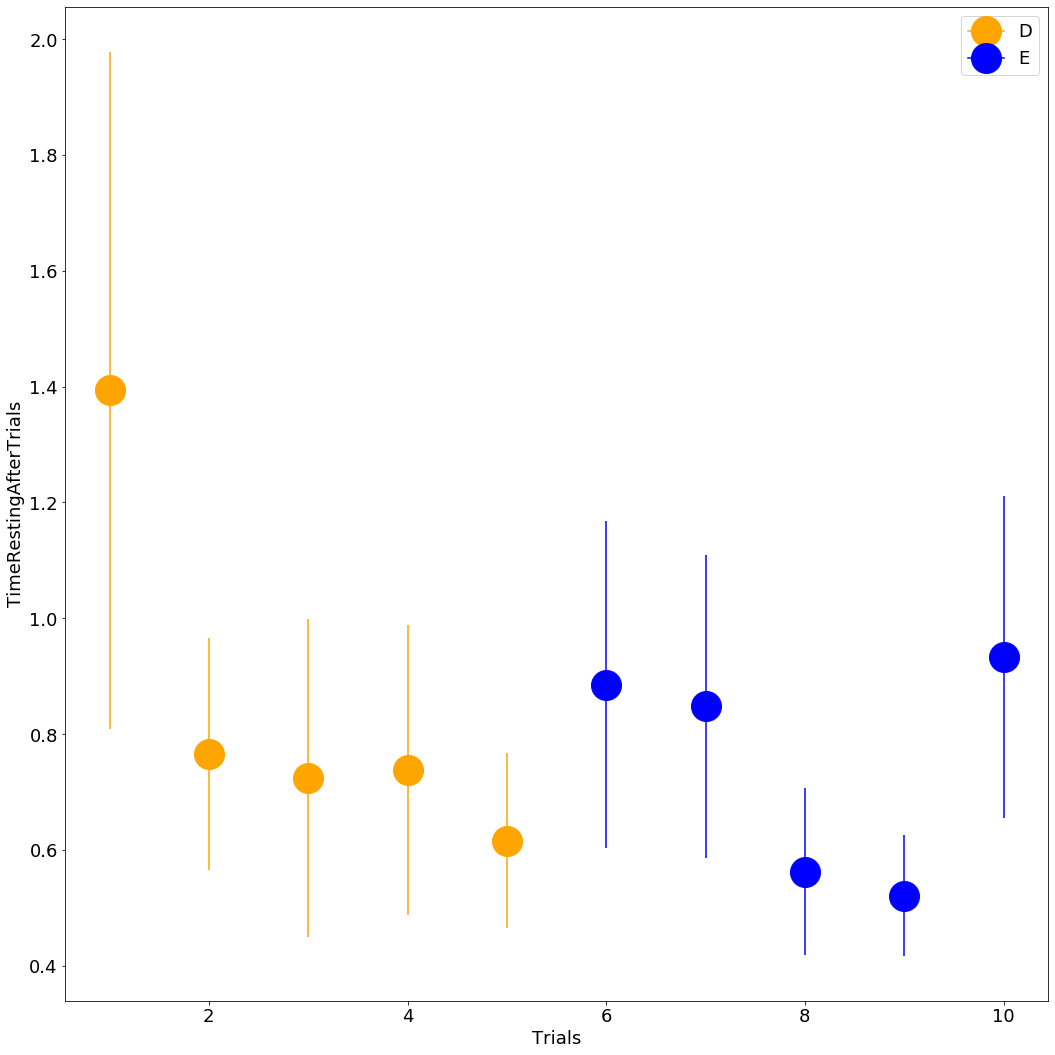

In [8]:


variable = 'TimeRestingAfterTrials'



timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
session1Color = 'blue'
session2Color = 'orange'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = session1Color)
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = session2Color)
    
    ax1.set_ylabel('TimeRestingAfterTrials')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([0.05, 0.32])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1, p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\TimeRestingAfterTrials_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    session1Color = 'orange'
    session2Color = 'blue'
    
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






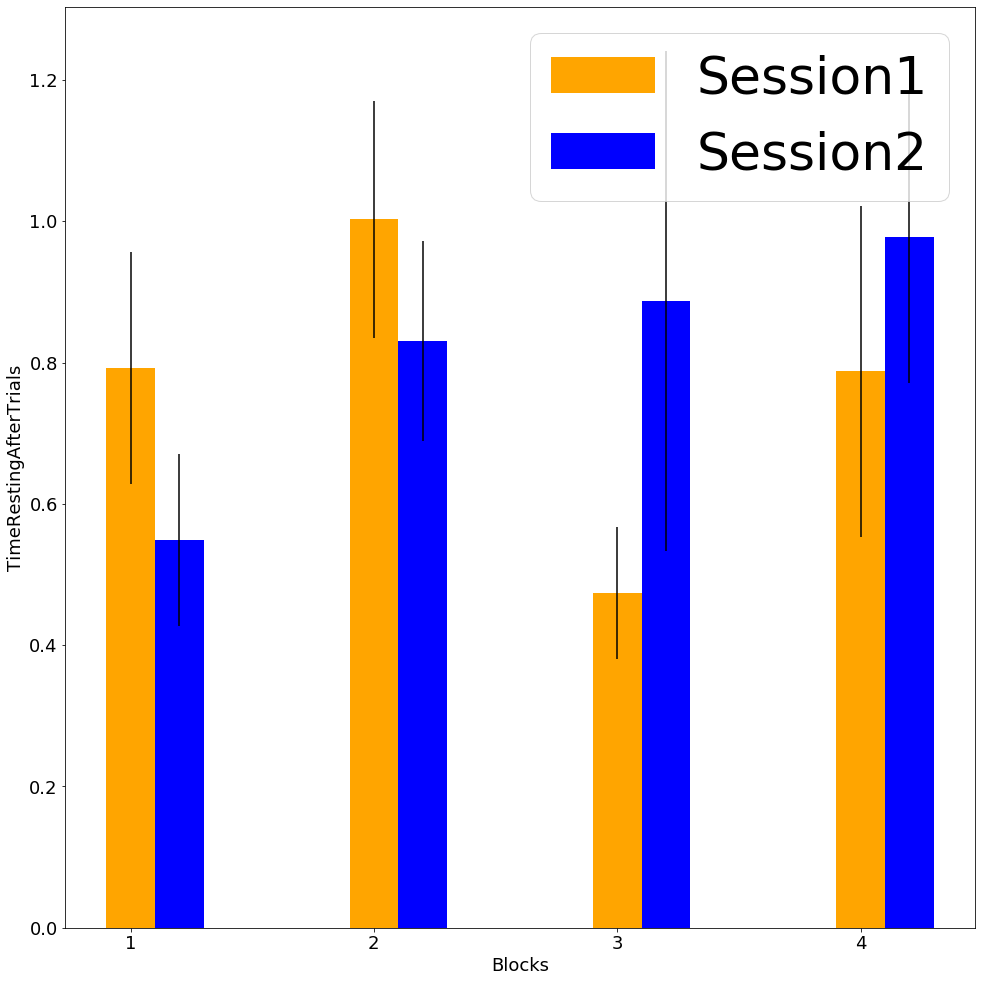

In [9]:
PlotTitle = 'TimeRestingAfterTrials'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['TimeRestingAfterTrials']



label_fontSize = 18
others_fontSize = 12

#boxplot = df1[np.logical_and(df1.Session==1, df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'TimeRestingAfterTrials'



for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue

    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4'])
#ax1.set_ylim([0, 0.5])
ax1.set_ylabel('TimeRestingAfterTrials')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 52})
ax1.legend((p1, p2), ('Session1', 'Session2'))
#plt.rcParams.update({'font.size': 32})


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\TimeRestingAfterTrials_blocks_sessions.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

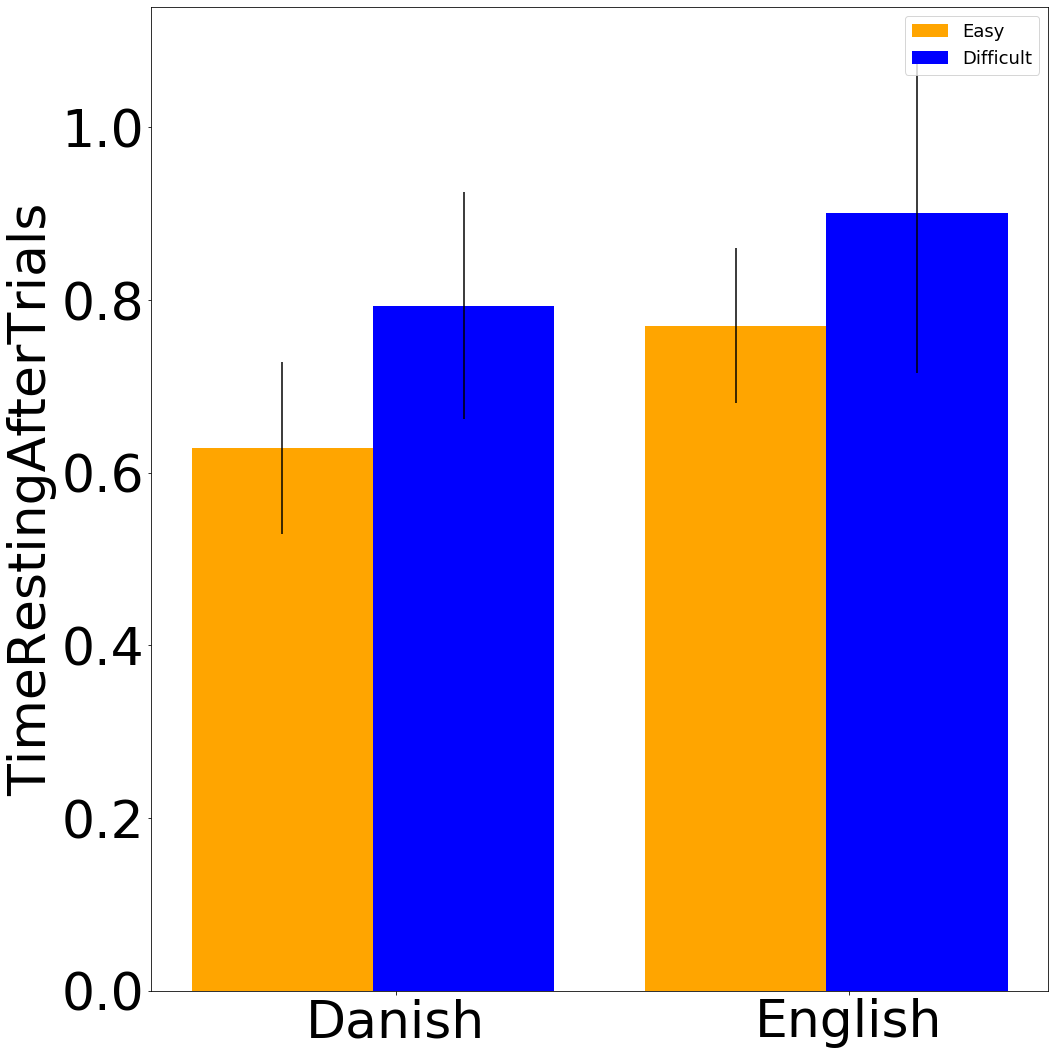

In [10]:
PlotTitle = 'TimeRestingAfterTrials'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['TimeRestingAfterTrials']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA')].mean())
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    p3 = ax1.bar(x_inds[ind+2], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
    p4 = ax1.bar(x_inds[ind+3], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
#ax1.set_ylim([0, 0.1])
ax1.set_ylabel('TimeRestingAfterTrials')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\TimeRestingAfterTrials_Language_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

# Backspace activations

In [15]:
variable = 'BackspaceActivations'

# sDiff

print('sDiff')
print('E', np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])))
print('D',np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])))


# Day
print('Day')
day1_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)]))
day1_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])))
day2_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)]))
day2_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])))
day3_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)]))
day3_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])))
day4_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)]))
day4_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])))

day_m = [day2_m-day1_m, day3_m-day2_m, day4_m-day3_m]
day_s = [np.sqrt(day1_s**2+day2_s**2), np.sqrt(day2_s**2 + day3_s**2), np.sqrt(day3_s**2+day4_s**2)]
print(day_m)
print(np.mean(day_m))
print(day_s)
print(np.mean(day_s))

# Session
print('Session')
print(np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==2)])-np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==1)]))
session2_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==2)])))
session1_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==1)])))
print(np.sqrt(session1_s**2+session2_s**2))


sDiff
E 0.05675171037203741
0.006314795751822724
D 0.05823120224990184
0.005579149307378395
Day
[0.02441348294096011, -0.00766850977358445, 0.01810705470760811]
0.011617342624994588
[0.010263439915092225, 0.01153270687515597, 0.0133994310411086]
0.011731859277118931
Session
0.017360413334729277
0.008422963442441426


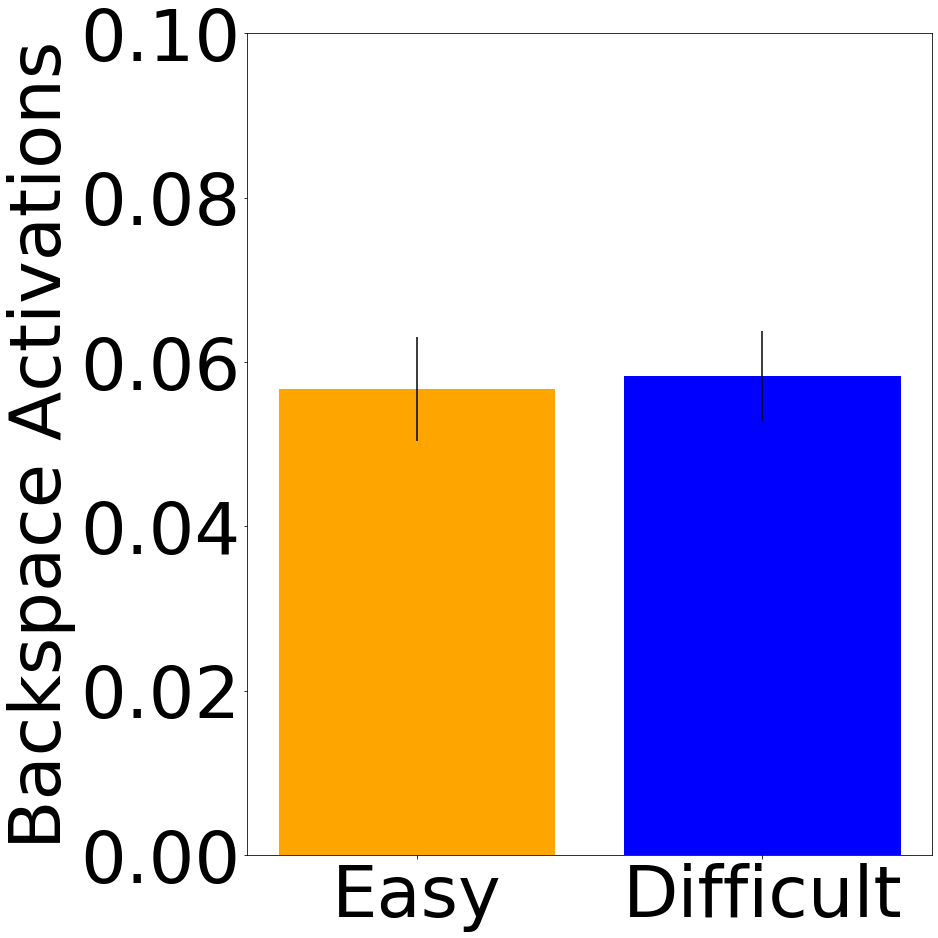

In [44]:
PlotTitle = 'Backspace Activations'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BackspaceActivations']

label_fontSize = 72
others_fontSize = 62


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 0.1])
ax1.set_ylabel('Backspace Activations')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\backspaceActivations.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Over blocks of dwell-time selection

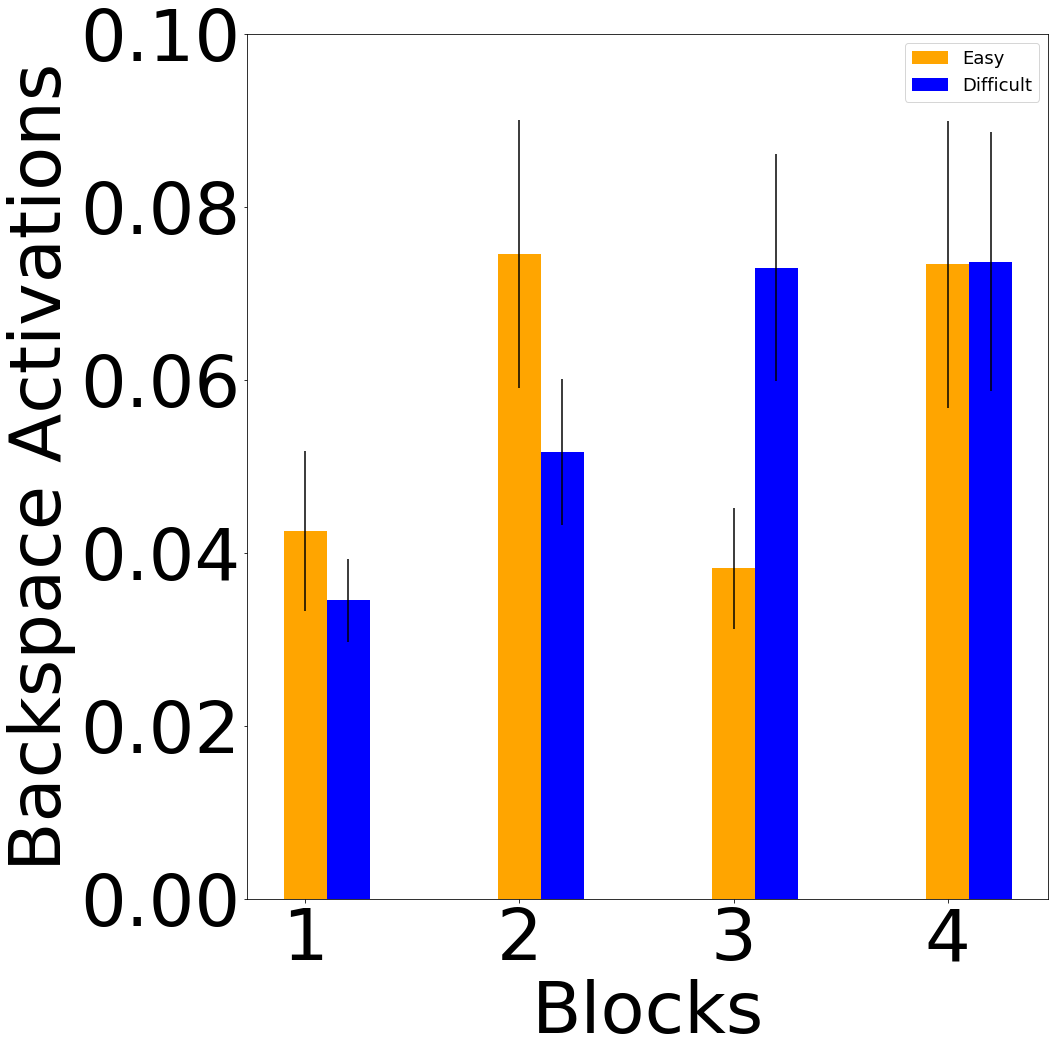

In [45]:
PlotTitle = 'Backspace Activations'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BackspaceActivations']



label_fontSize = 18
others_fontSize = 12

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'BackspaceActivations'



for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue

    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 0.1])
ax1.set_ylabel('Backspace Activations')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\backspaceActivations_blocks.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

# Over all blocks

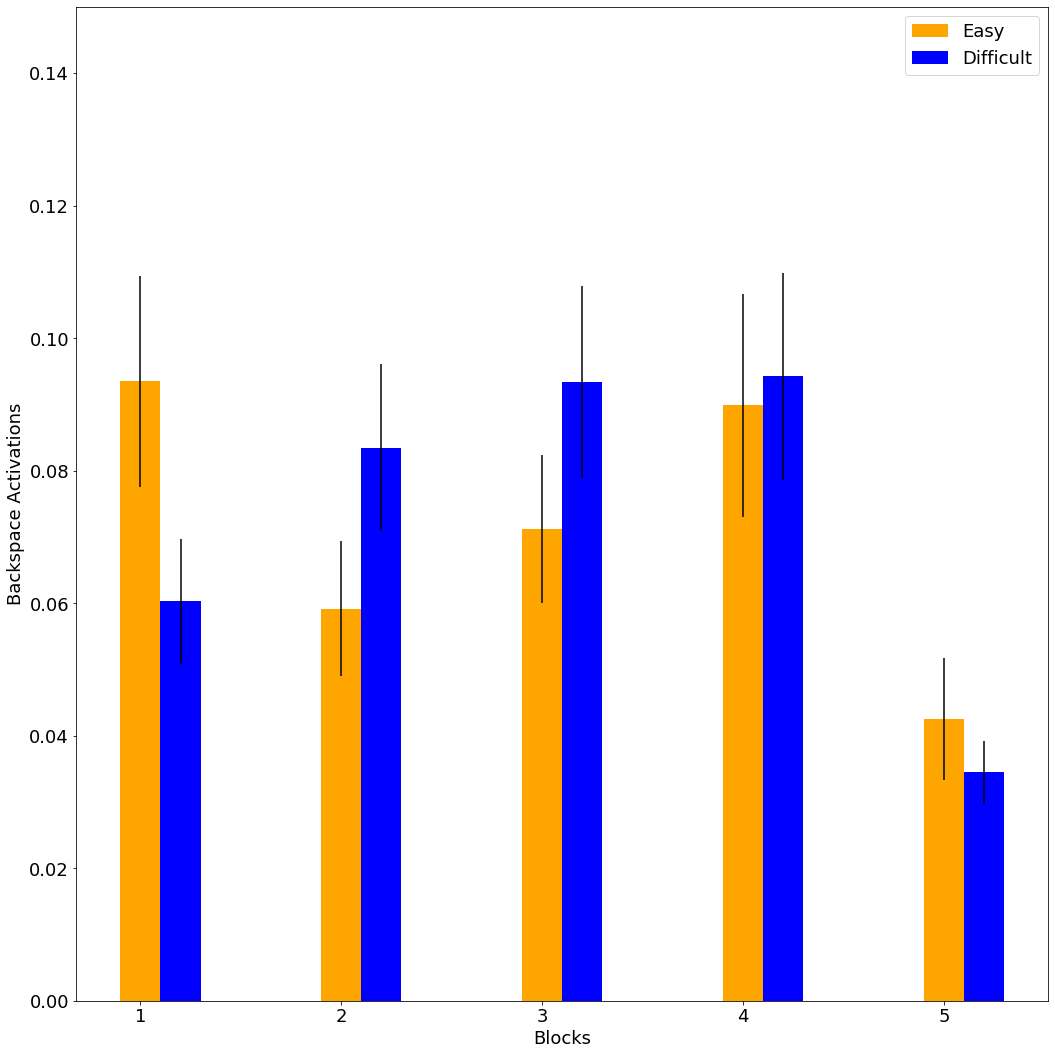

In [46]:
PlotTitle = 'BackspaceActivations'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BackspaceActivations']



label_fontSize = 18
others_fontSize = 12

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayNr==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5, 11]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'BackspaceActivations'



for indDay, day in enumerate(np.unique(df1.DayNr)):
    

    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayNr==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayNr==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayNr==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayNr==day)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayNr==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayNr==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4', '5'])
ax1.set_ylim([0, 0.15])
ax1.set_ylabel('Backspace Activations')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\backspaceActivations_blocks_DTnMS.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Over sessions

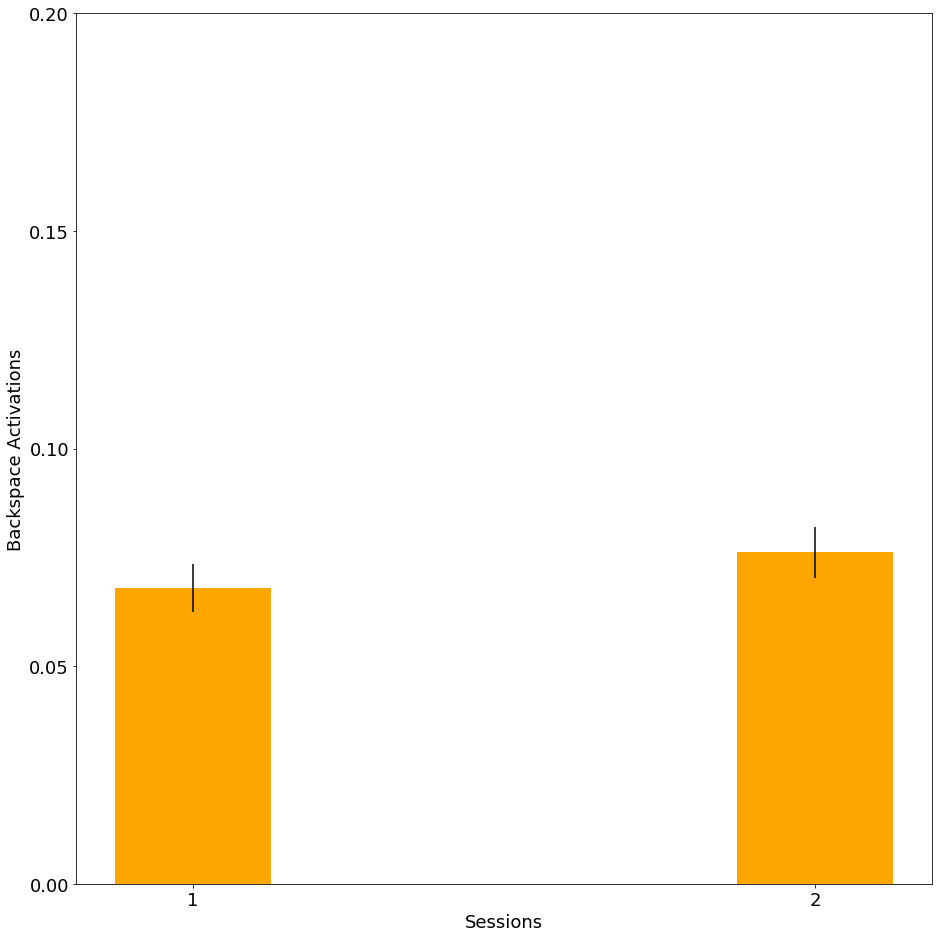

In [47]:
PlotTitle = 'BackspaceActivations'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BackspaceActivations']



label_fontSize = 72
others_fontSize = 62

#boxplot = df1[df1.Session==session)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,3]

list1 = list()
x_list1 = list()

variable = 'BackspaceActivations'



for indDay, session in enumerate(np.unique(df1.Session)):


    p1 = ax1.bar(x_inds[indDay], df1[variable][df1.Session==session].mean(), yerr = \
                 df1[variable][df1.Session==session].std()/ \
                 np.sqrt(df1[variable][df1.Session==session].count()), \
                 color='orange', label='Easy', width=0.5)
    
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2'])
ax1.set_ylim([0, 0.2])
ax1.set_ylabel('Backspace Activations')
ax1.set_xlabel('Sessions')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\backspaceActivations_sessions.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

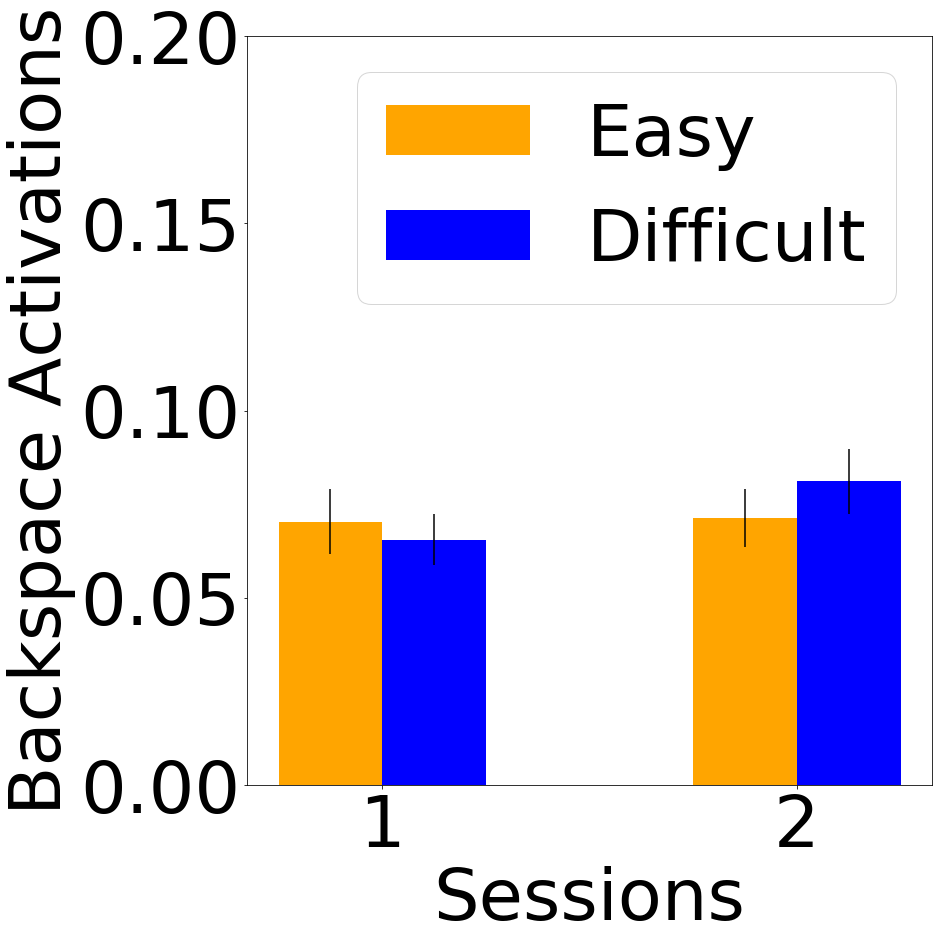

In [48]:
PlotTitle = 'BackspaceActivations'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BackspaceActivations']



label_fontSize = 72
others_fontSize = 62

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,3]

list1 = list()
x_list1 = list()

variable = 'BackspaceActivations'



for indDay, session in enumerate(np.unique(df1.Session)):


    p1 = ax1.bar(x_inds[indDay], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay]+0.5, df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.Session==session)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.Session==session)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.Session==session)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.25])
ax1.set_xticklabels(['1', '2'])
ax1.set_ylim([0, 0.2])
ax1.set_ylabel('Backspace Activations')
ax1.set_xlabel('Sessions')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\backspaceActivations_sessions_EnD.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

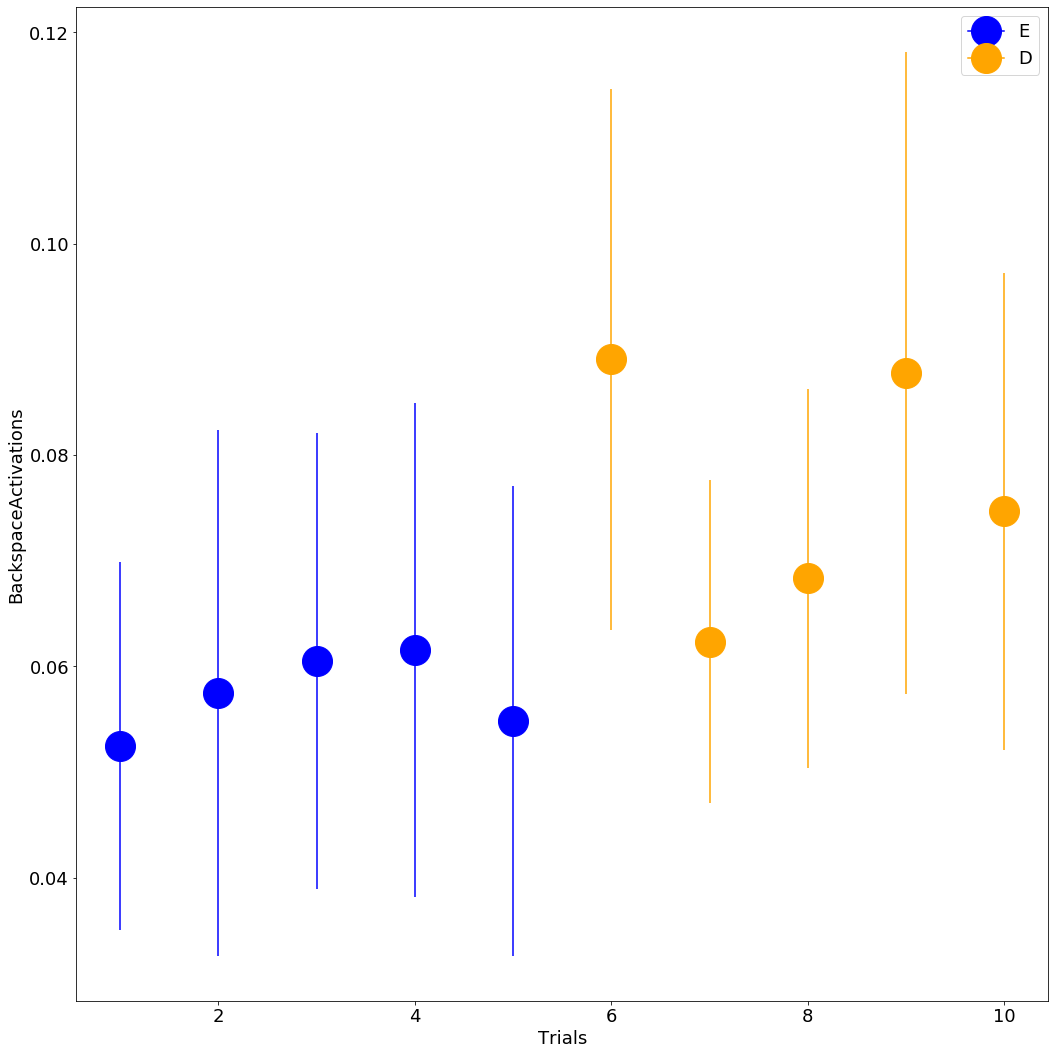

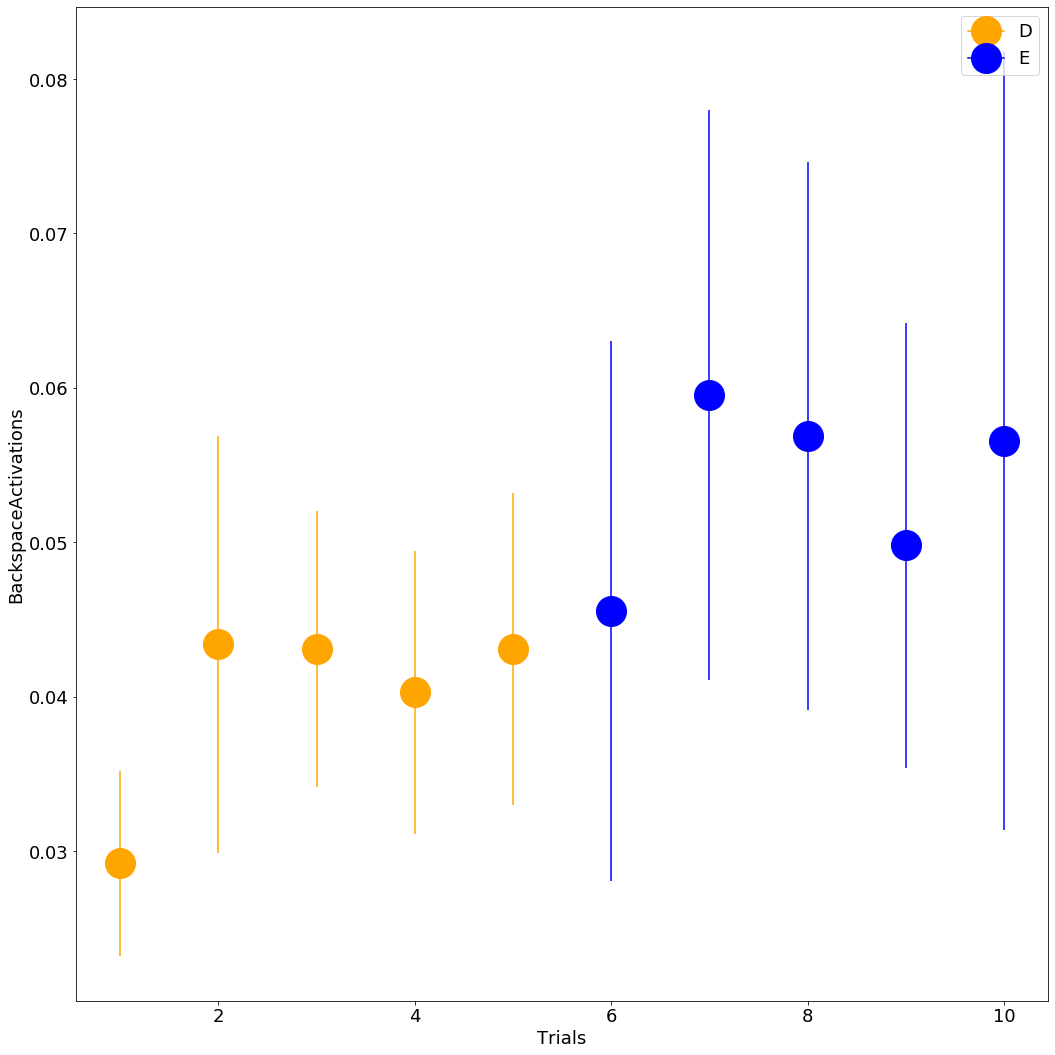

In [7]:


variable = 'BackspaceActivations'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
session1Color = 'blue'
session2Color = 'orange'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = session1Color)
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = session2Color)
    
    ax1.set_ylabel('BackspaceActivations')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([0.05, 0.32])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1, p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\BackspaceActivations_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    session1Color = 'orange'
    session2Color = 'blue'
    
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






# ReadTextEventsPerTotalTime

In [20]:
variable = 'ReadTextEventsPerTotalTime'

# sDiff

print('sDiff')
print('E', np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])))
print('D',np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])))


# Day
print('Day')
day1_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)]))
day1_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])))
day2_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)]))
day2_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])))
day3_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)]))
day3_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])))
day4_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)]))
day4_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])))

day_m = [day2_m-day1_m, day3_m-day2_m, day4_m-day3_m]
day_s = [np.sqrt(day1_s**2+day2_s**2), np.sqrt(day2_s**2 + day3_s**2), np.sqrt(day3_s**2+day4_s**2)]
print(day_m)
print(np.mean(day_m))
print(day_s)
print(np.mean(day_s))

# Session
print('Session')
day1_s1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==1)]))
day1_s1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==1)])))
day2_s1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==1)]))
day2_s1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==1)])))
day3_s1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==1)]))
day3_s1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==1)])))
day4_s1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==1)]))
day4_s1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==1)])))

day1_s2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==2)]))
day1_s2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==2)])))
day2_s2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==2)]))
day2_s2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==2)])))
day3_s2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==2)]))
day3_s2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==2)])))
day4_s2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==2)]))
day4_s2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==2)])))



session_m = [day1_s2_m - day1_s1_m, day2_s2_m - day2_s1_m, day3_s2_m - day3_s1_m, day4_s2_m - day4_s1_m]
session_s = [np.sqrt(day1_s2_m**2+day1_s1_m**2), np.sqrt(day2_s2_m**2 + day2_s1_m**2), np.sqrt(day3_s2_m**2+day3_s1_m**2), \
        np.sqrt(day4_s2_m**2 + day4_s1_m**2)]
print(session_m)
print(np.mean(session_m))
print(session_s)
print(np.mean(session_s))


# Session
print('Language')
print(np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='DA')])-np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='EN')]))
sessionD_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='DA')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='DA')])))
sessionE_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='EN')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='EN')])))
print(np.sqrt(sessionD_s**2+sessionE_s**2))


sDiff
E 0.04100277720676089
0.0019528611735484766
D 0.056214664767976215
0.002879920231483421
Day
[0.005359540233647542, 0.0019058976678454978, 0.0023964313440159035]
0.0032206230818363143
[0.004286440669557285, 0.0047763672525045625, 0.005549729258732412]
0.00487084572693142
Session
[-0.0007324599456092346, 0.007252527192146467, 0.01776115026132298, -0.012232850831169699]
0.0030120916691726285
[0.06077378194931674, 0.06852334682987622, 0.07229066186834866, 0.07499277117746626]
0.06914514045625197
Language
0.023618412980385993
0.003621403529803932


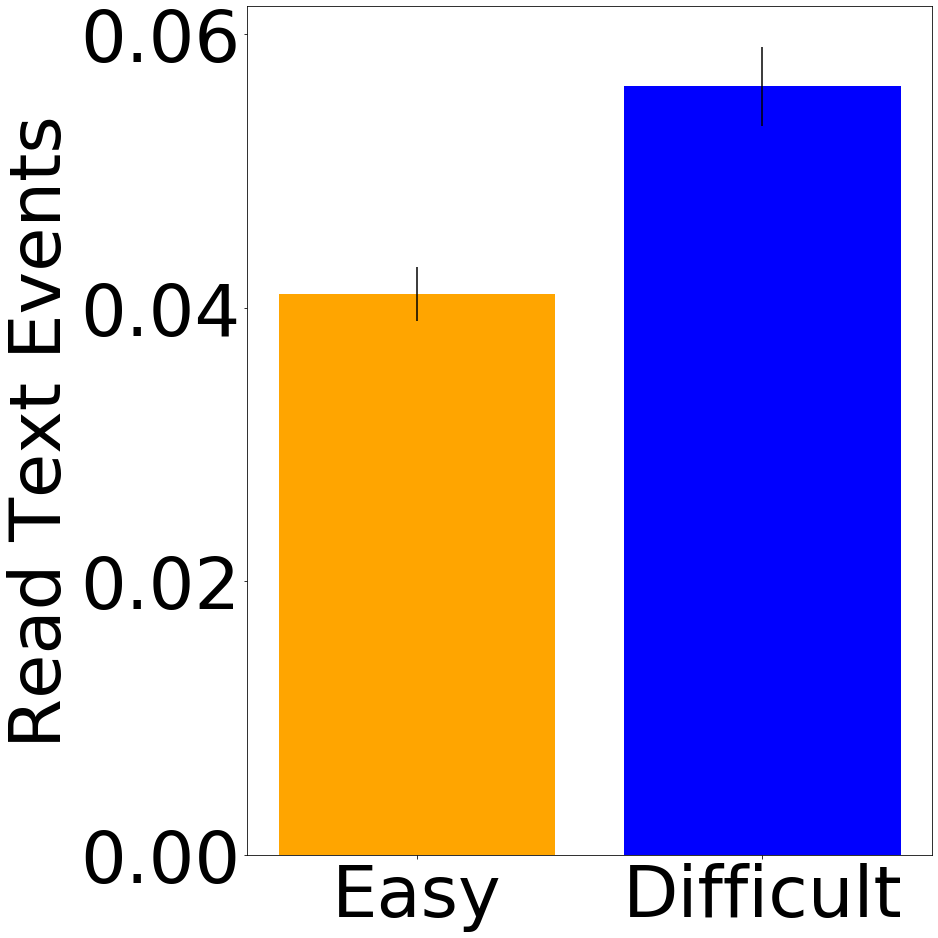

In [49]:
PlotTitle = 'ReadTextEventsPerTotalTime'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ReadTextEventsPerTotalTime']

label_fontSize = 72
others_fontSize = 62


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([0, 0.1])
ax1.set_ylabel('Read Text Events')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\readTextEventsPerTotalTime.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## And language

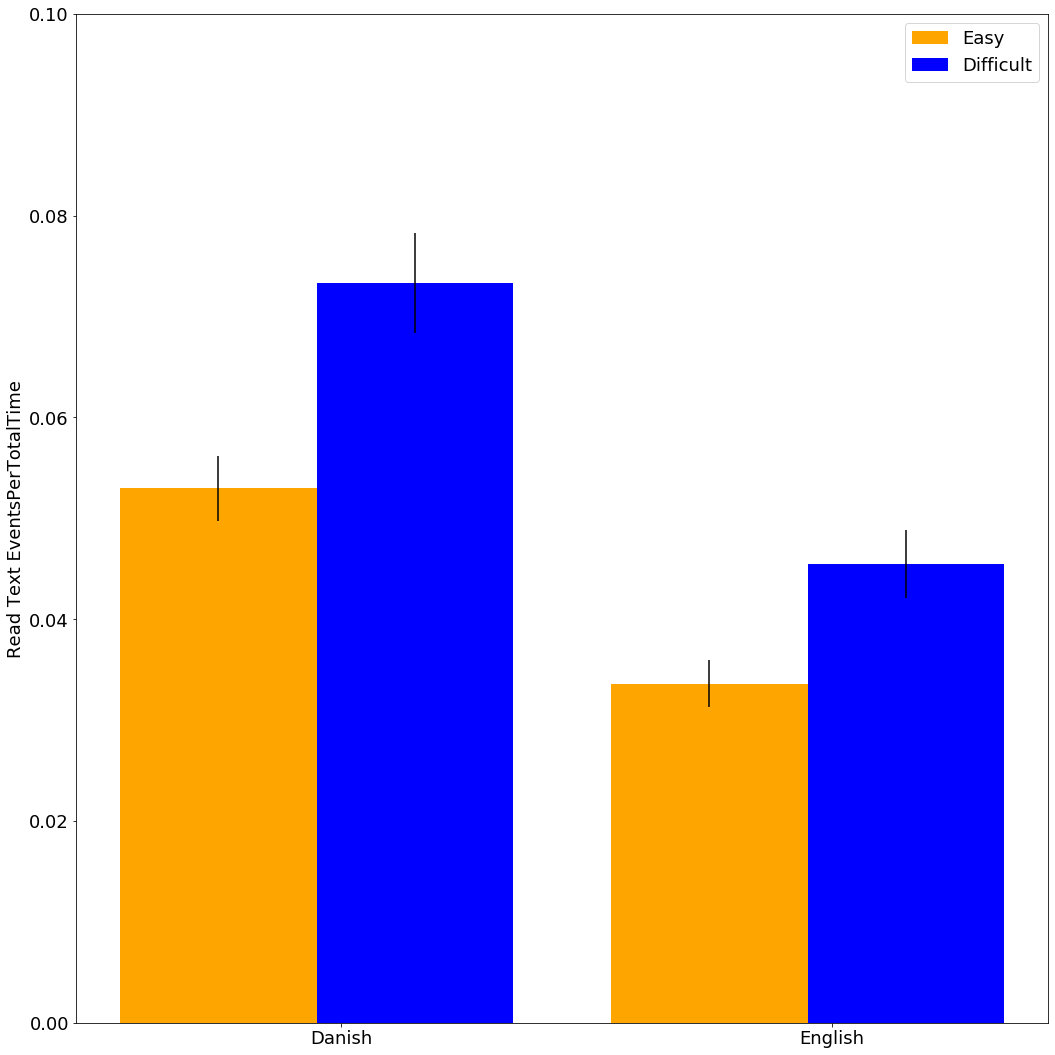

In [53]:
PlotTitle = 'ReadTextEventsPerTotalTime'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ReadTextEventsPerTotalTime']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA')].mean())
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    p3 = ax1.bar(x_inds[ind+2], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
    p4 = ax1.bar(x_inds[ind+3], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 0.1])
ax1.set_ylabel('Read Text EventsPerTotalTime')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\ReadTextEventsPerTotalTime_Language_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

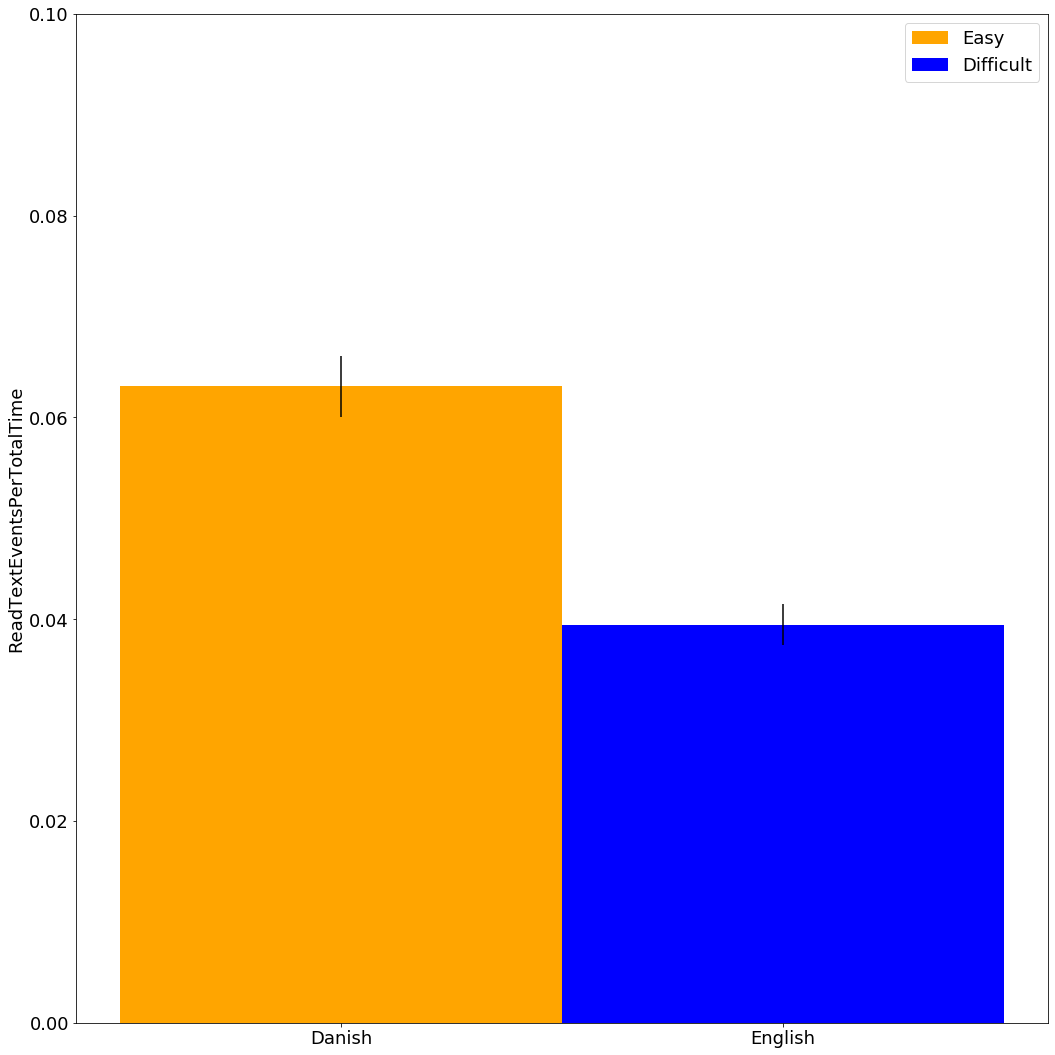

In [55]:
PlotTitle = 'ReadTextEventsPerTotalTime'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ReadTextEventsPerTotalTime']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.Language=='DA', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Language=='DA', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.Language=='DA', df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(df1.Language=='EN', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Language=='EN', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.Language=='EN', df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1, 1.8])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 0.1])
ax1.set_ylabel('ReadTextEventsPerTotalTime')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\ReadTextEventsPerTotalTime_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

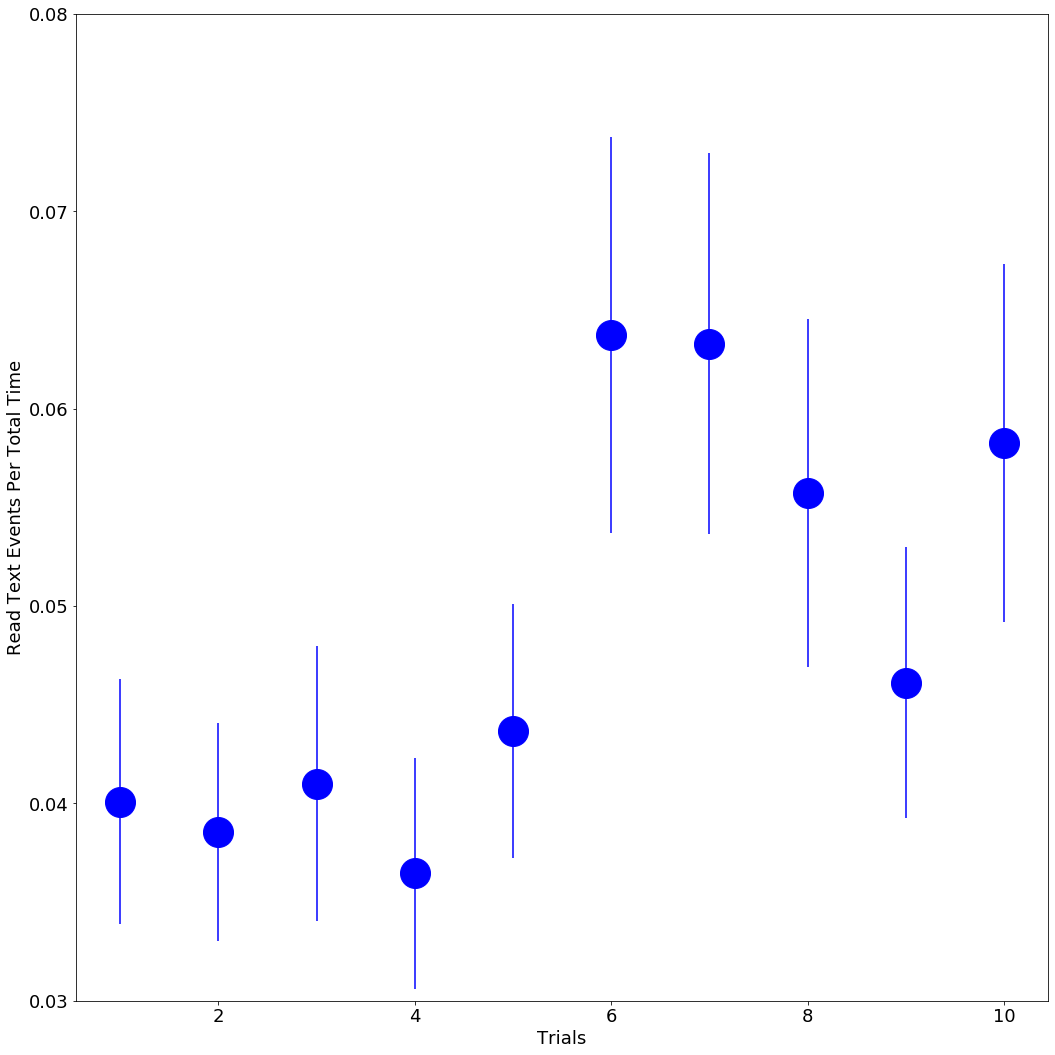

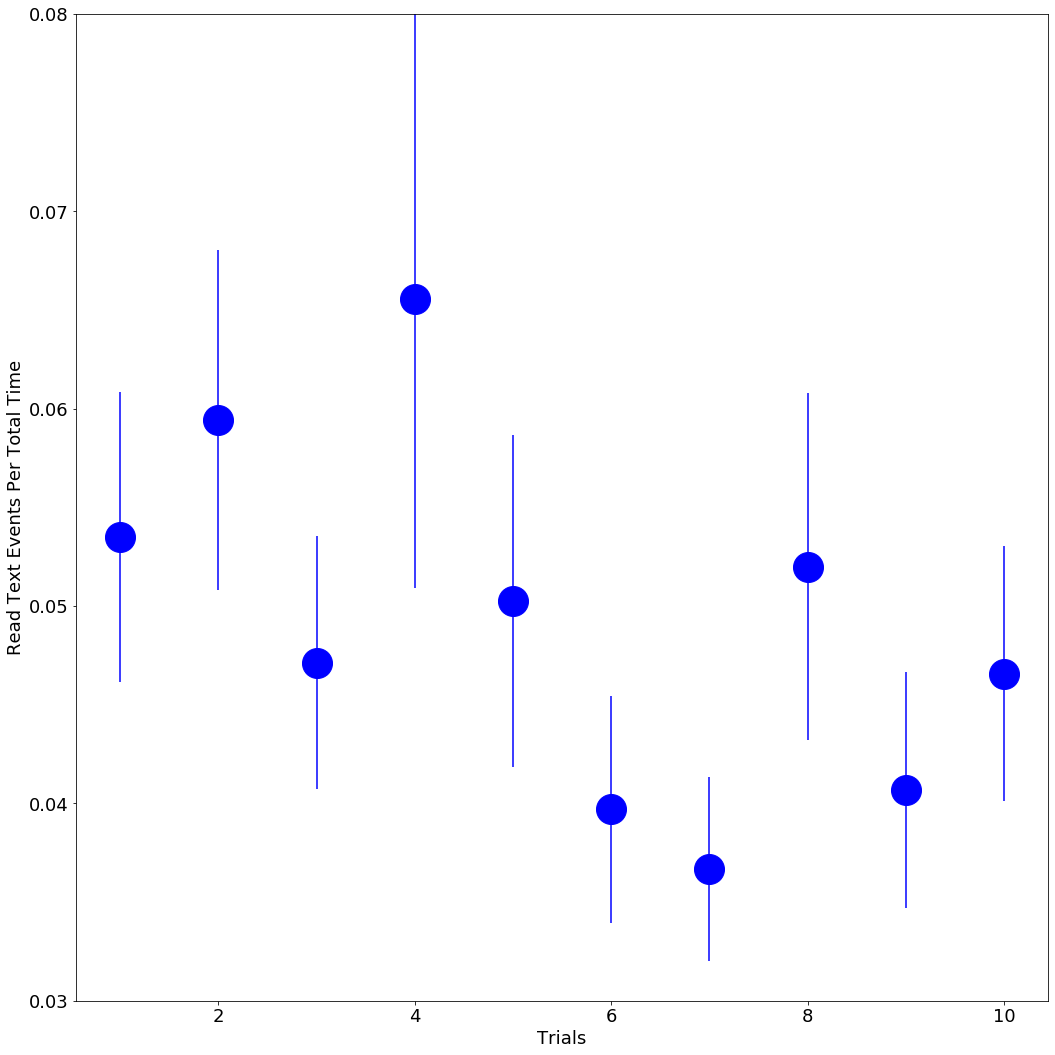

In [55]:


variable = 'ReadTextEventsPerTotalTime'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
    
    ax1.set_ylabel('Read Text Events Per Total Time')
    ax1.set_xlabel('Trials')
    ax1.set_ylim([0.03, 0.08])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\ReadTextEventsPerTotalTime_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    
    
ax1.set_ylabel('Read Text Events Per Total Time')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






# AttendedButNotSelected

In [21]:
variable = 'AttendedButNotSelected'

# sDiff

print('sDiff')
print('E', np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])))
print('D',np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])))


# Day
print('Day')
day1_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)]))
day1_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])))
day2_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)]))
day2_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])))
day3_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)]))
day3_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])))
day4_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)]))
day4_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])))

day_m = [day2_m-day1_m, day3_m-day2_m, day4_m-day3_m]
day_s = [np.sqrt(day1_s**2+day2_s**2), np.sqrt(day2_s**2 + day3_s**2), np.sqrt(day3_s**2+day4_s**2)]
print(day_m)
print(np.mean(day_m))
print(day_s)
print(np.mean(day_s))

# Session
print('Session')
day1_s1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==1)]))
day1_s1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==1)])))
day2_s1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==1)]))
day2_s1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==1)])))
day3_s1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==1)]))
day3_s1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==1)])))
day4_s1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==1)]))
day4_s1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==1)])))

day1_s2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==2)]))
day1_s2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==2)])))
day2_s2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==2)]))
day2_s2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==2)])))
day3_s2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==2)]))
day3_s2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==2)])))
day4_s2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==2)]))
day4_s2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==2)])))



session_m = [day1_s2_m - day1_s1_m, day2_s2_m - day2_s1_m, day3_s2_m - day3_s1_m, day4_s2_m - day4_s1_m]
session_s = [np.sqrt(day1_s2_m**2+day1_s1_m**2), np.sqrt(day2_s2_m**2 + day2_s1_m**2), np.sqrt(day3_s2_m**2+day3_s1_m**2), \
        np.sqrt(day4_s2_m**2 + day4_s1_m**2)]
print(session_m)
print(np.mean(session_m))
print(session_s)
print(np.mean(session_s))


# Session
print('Language')
print(np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='DA')])-np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='EN')]))
sessionD_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='DA')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='DA')])))
sessionE_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='EN')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='EN')])))
print(np.sqrt(sessionD_s**2+sessionE_s**2))


sDiff
E 0.5370597898087045
0.02252326112436971
D 0.6152499621035774
0.025050611803486462
Day
[-0.22493460627216166, -0.12265266571621325, -0.02928338300858907]
-0.12562355166565467
[0.04863725843758659, 0.039608080159801516, 0.04111673934717472]
0.04312069264818761
Session
[-0.24114067789973914, -0.04064947763274984, -0.005666343153194253, -0.06083685818488255]
-0.08707333921764145
[1.157901428013841, 0.8305936222858603, 0.6564489334930026, 0.616809560761588]
0.815438386138573
Language
0.22876574510961234
0.03341122749204788


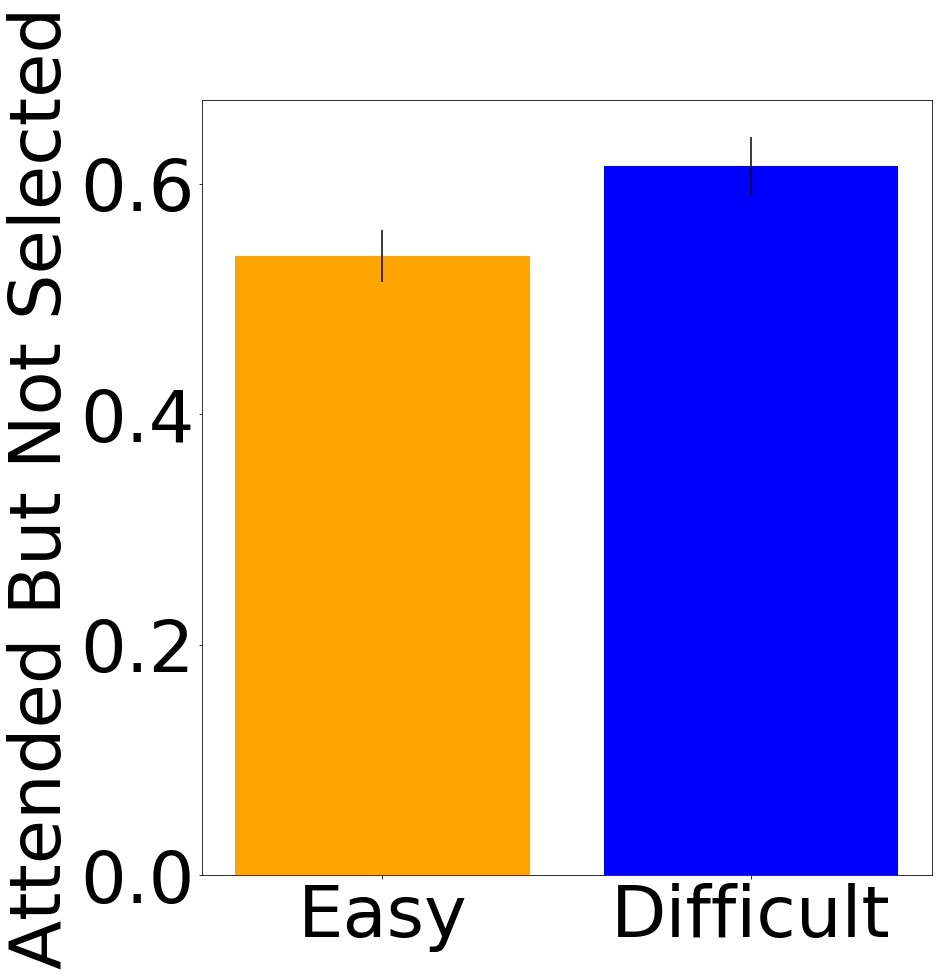

In [50]:
PlotTitle = 'AttendedButNotSelected'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['AttendedButNotSelected']

label_fontSize = 72
others_fontSize = 62


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([0, 0.1])
ax1.set_ylabel('Attended But Not Selected')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\attendedButNotSelected.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

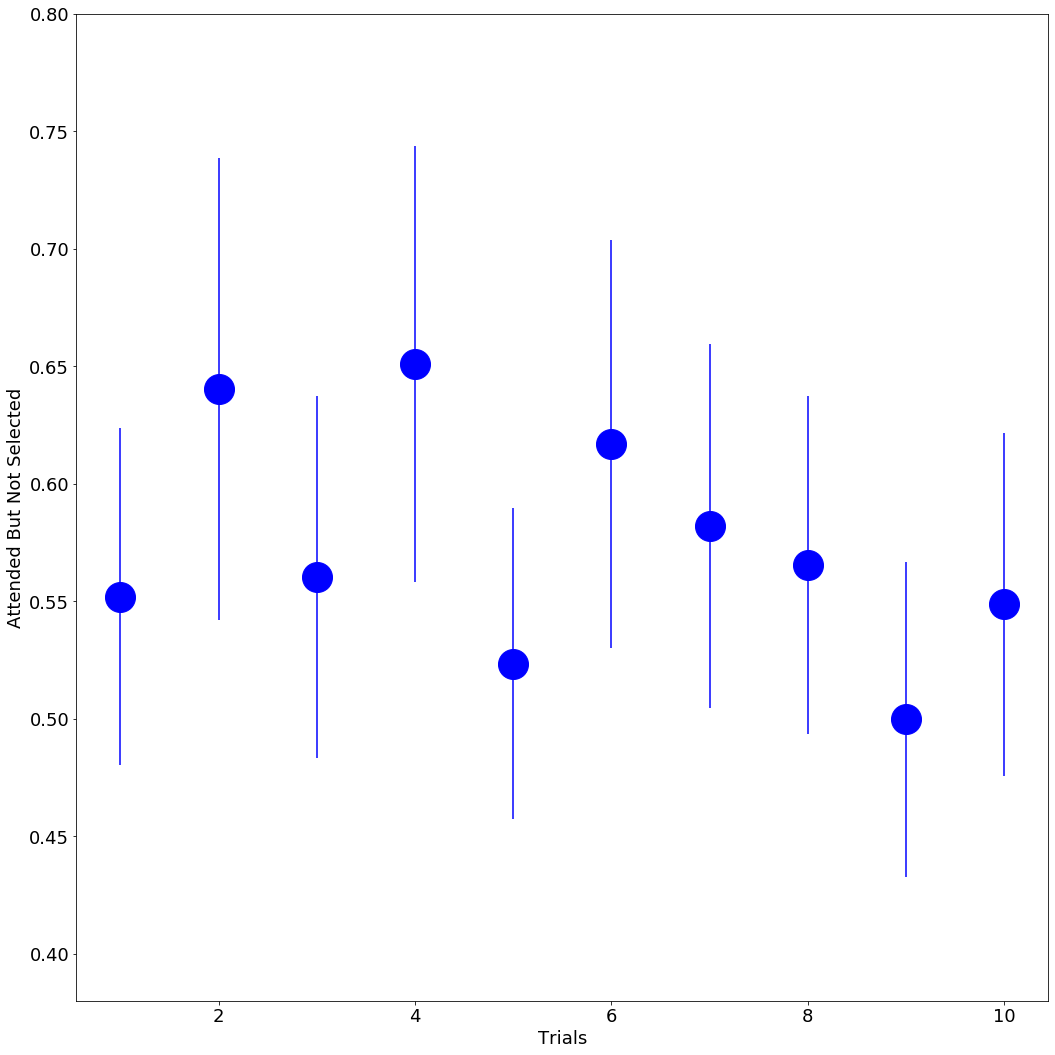

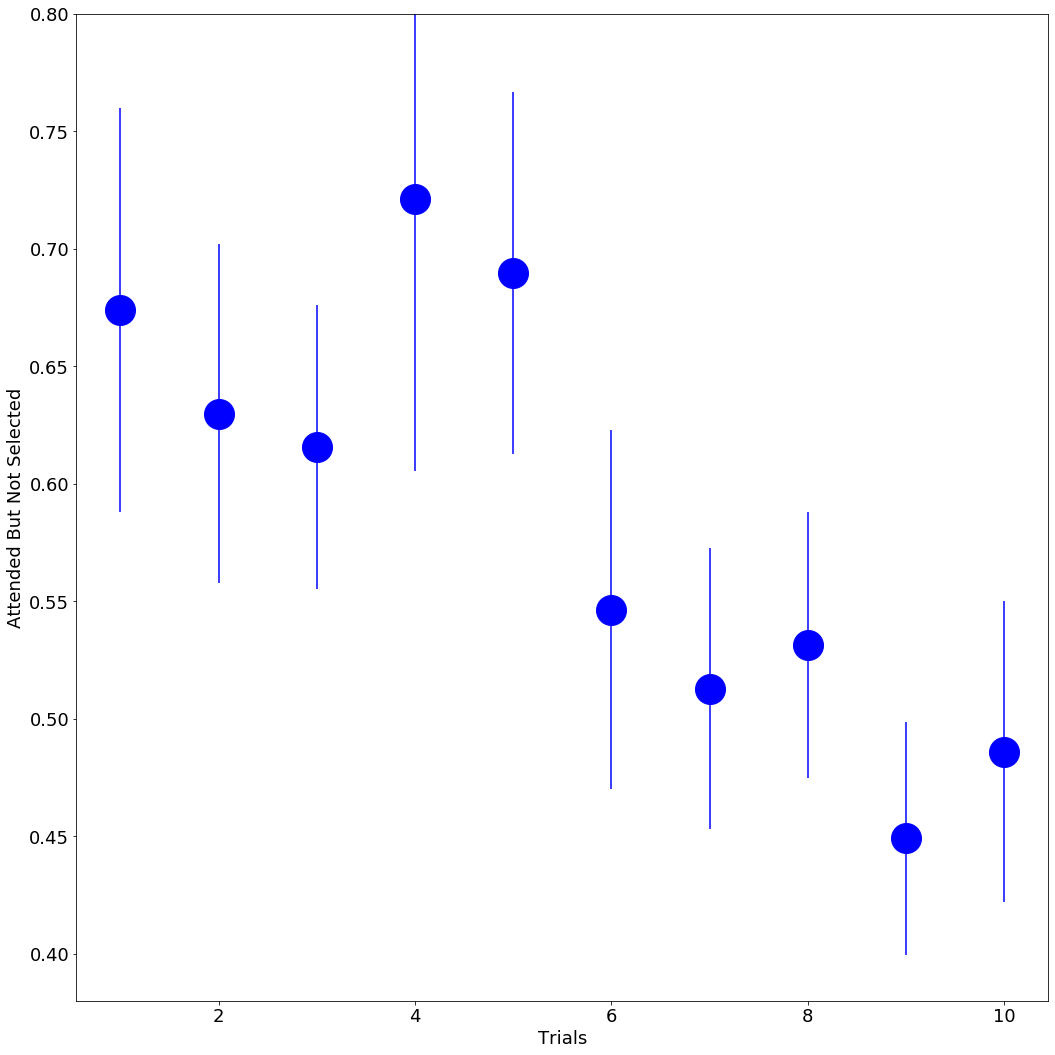

In [51]:


variable = 'AttendedButNotSelected'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
    
    ax1.set_ylabel('Attended But Not Selected')
    ax1.set_xlabel('Trials')
    ax1.set_ylim([0.38, 0.8])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
        
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\AttendedButNotSelected_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    
    






# Characters Per Effective Time

In [7]:
PlotTitle = 'Characters Per Effective Time'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CharactersPerEffectiveTime']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# Correct Letters Per Total Time

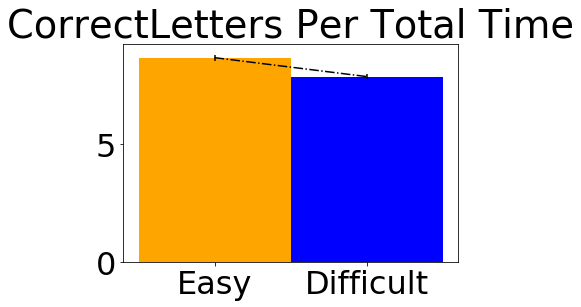

In [25]:
PlotTitle = 'CorrectLetters Per Total Time'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CorrectLettersPerTotalTime']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# CorrectLettersPerEffectiveTime

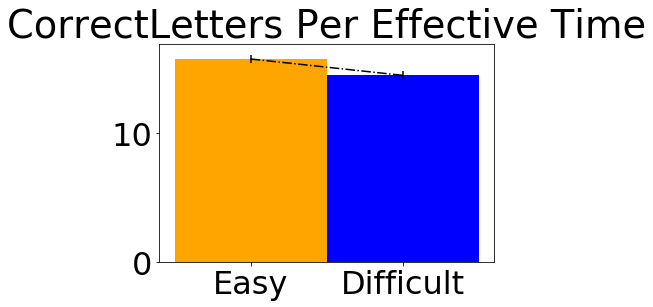

In [24]:
PlotTitle = 'CorrectLetters Per Effective Time'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CorrectLettersPerEffectiveTime']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# TotalTime_writing

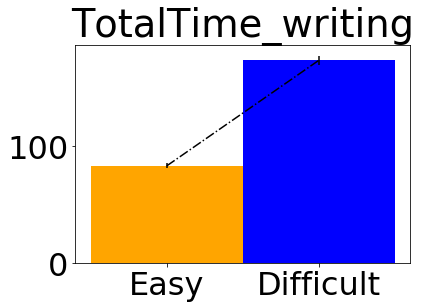

In [23]:
PlotTitle = 'TotalTime_writing'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['TotalTime_writing']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# EffectiveTime_writing

In [65]:
PlotTitle = 'EffectiveTime_writing'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['EffectiveTime_writing']


label_fontSize = 72
others_fontSize = 62

#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1, 2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+1)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+1, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks([1,2])
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 135])
ax1.set_ylabel('Time [in s]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level
maxTime = 115
y_time, h, col = maxTime, 4, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\effectiveTime.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [66]:
PlotTitle = 'TimePerKey'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['TimePerKey']

label_fontSize = 72
others_fontSize = 62

#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylabel('Time [in s]')
ax1.set_ylim([0, 1.3])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))





# annotate with significance level
maxTime = 1.1
y_time, h, col = maxTime, 0.05, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\timePerKey.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

# ActivationsPerTotalTime

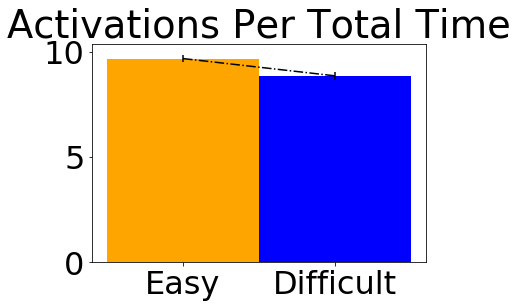

In [21]:
PlotTitle = 'Activations Per Total Time'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ActivationsPerTotalTime']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# ReadTextEventsPerCharacter

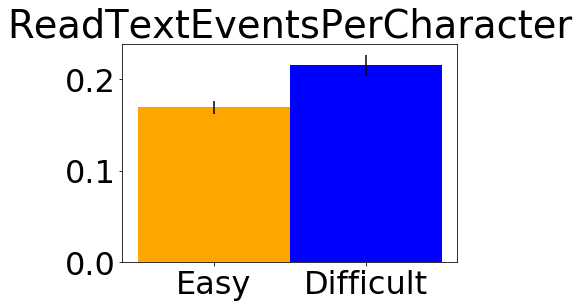

In [28]:
PlotTitle = 'ReadTextEventsPerCharacter'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ReadTextEventsPerCharacter']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# ReadTextEventsPerTime

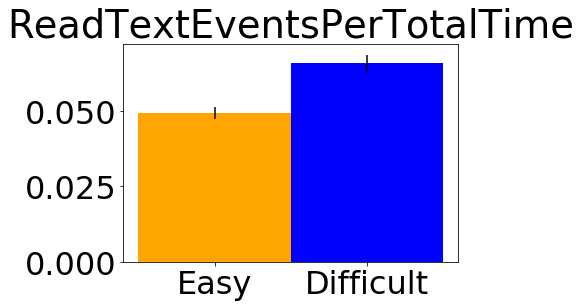

In [29]:
PlotTitle = 'ReadTextEventsPerTotalTime'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ReadTextEventsPerTotalTime']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# AttendedButNotSelected

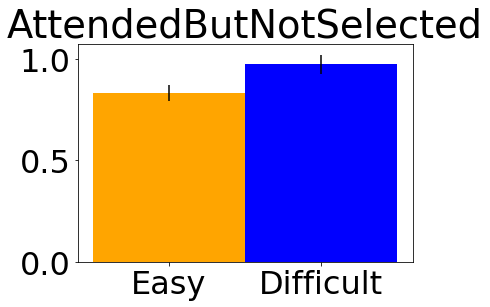

In [30]:
PlotTitle = 'AttendedButNotSelected'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['AttendedButNotSelected']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# Multi-Key Selection

## Characters Per Total Time (Easy and difficult session)

In [7]:
PlotTitle = 'Characters Per Total Time'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CharactersPerTotalTime']



label_fontSize = 72
others_fontSize = 62

#boxplot = df1[df1.df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][np.logical_and(df1.TypingTechnique=='MS', df1.SessionDifficulty=='E')].mean())
    list1.append(df1[variable][np.logical_and(df1.TypingTechnique=='MS', df1.SessionDifficulty=='D')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.TypingTechnique=='MS', df1.SessionDifficulty=='E')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.TypingTechnique=='MS', df1.SessionDifficulty=='E')].std()/np.sqrt(df1[variable][np.logical_and(df1.TypingTechnique=='MS', df1.SessionDifficulty=='E')].count()), color='orange', label='Dwell-time Selection')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(df1.TypingTechnique=='MS', df1.SessionDifficulty=='D')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.TypingTechnique=='MS', df1.SessionDifficulty=='D')].std()/np.sqrt(df1[variable][np.logical_and(df1.TypingTechnique=='MS', df1.SessionDifficulty=='D')].count()), color='blue', label='Multi-key Selection')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 12])
ax1.set_ylabel('Typing speed')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level
#maxTime = 9.8
#y_time, h, col = maxTime, 0.2, 'k'
#ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
#fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\typingSpeed.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

# Multi-Key Selection vs Dwell-Time Selection

## Characters Per Total Time

In [8]:
PlotTitle = 'Characters Per Total Time'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['CharactersPerTotalTime']



label_fontSize = 72
others_fontSize = 62

#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.TypingTechnique=='DT'].mean())
    list1.append(df1[variable][df1.TypingTechnique=='MS'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.TypingTechnique=='DT'].mean(), yerr = \
                 df1[variable][df1.TypingTechnique=='DT'].std()/np.sqrt(df1[variable][df1.TypingTechnique=='DT'].count()), color='orange', label='Dwell-time Selection')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.TypingTechnique=='MS'].mean(), yerr = \
                 df1[variable][df1.TypingTechnique=='MS'].std()/np.sqrt(df1[variable][df1.TypingTechnique=='MS'].count()), color='blue', label='Multi-key Selection')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Dwell-time Selection', 'Multi-Key Selection'])
ax1.set_ylim([0, 12])
ax1.set_ylabel('Typing speed')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level
#maxTime = 9.8
#y_time, h, col = maxTime, 0.2, 'k'
#ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
#fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\typingSpeed.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Error rate

In [25]:
PlotTitle = 'Error Rate'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ErrorRate']

label_fontSize = 72
others_fontSize = 62


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.TypingTechnique=='DT'].mean())
    list1.append(df1[variable][df1.TypingTechnique=='MS'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.TypingTechnique=='DT'].mean(), yerr = \
                 df1[variable][df1.TypingTechnique=='DT'].std()/np.sqrt(df1[variable][df1.TypingTechnique=='DT'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.TypingTechnique=='MS'].mean(), yerr = \
                 df1[variable][df1.TypingTechnique=='MS'].std()/np.sqrt(df1[variable][df1.TypingTechnique=='MS'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Dwell-time', 'Multi-key'])
ax1.set_ylim([0, 0.35])
ax1.set_ylabel('Error rate')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level
#maxTime = 0.27
#y_time, h, col = maxTime, 0.01, 'k'
#ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
#fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\errorRate.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))